In [1]:
from autoencoder import *
from classifier import *

# Descargandi el dataset

In [2]:
transform = transforms.Compose([transforms.ToTensor()])

# Download and load the training data
train_set_orig = datasets.FashionMNIST('MNIST_data/', download = True, train = True,  transform = transform)
valid_set_orig = datasets.FashionMNIST('MNIST_data/', download = True, train = False, transform = transform)

In [3]:
# Convertimos FashionMNIST Dataset a CustomDataset
train_set = CustomDataset(train_set_orig)
valid_set = CustomDataset(valid_set_orig)

# 1

In [4]:
# 1.1)
class Autoencoder(nn.Module):
    def __init__(self, n, p=0.2):
        super(Autoencoder, self).__init__()
        self.flatten = nn.Flatten()
        self.encoder = nn.Sequential(
            # Convolucional 1
            nn.Conv2d(1, 16, kernel_size=3),  # 1x28x28 -> 16x26x26
            nn.ReLU(),
            nn.Dropout(p),
            nn.MaxPool2d(2),  # 16x26x26 -> 16x13x13
            # Convolucional 2
            nn.Conv2d(16, 32, kernel_size=3),  # 16x13x13 -> 32x11x11
            nn.ReLU(),
            nn.Dropout(p),
            nn.MaxPool2d(2, 2),  # 32x11x11 -> 32x5x5
            # Linear
            nn.Flatten(),  # 32x5x5 -> 32*5*5
            nn.Linear(32*5*5, n),  # fully connected 32*5*5 -> n
            nn.ReLU(),
            nn.Dropout(p)
        )
        self.decoder = nn.Sequential(
            # Linear
            nn.Linear(n, 32*5*5),  # fully connected n -> 32*5*5
            nn.ReLU(),
            nn.Dropout(p),
            nn.Unflatten(1, (32,5,5)),  # 32*5*5 -> 32x5x5
            # Convolucional transpose (de la segunda convolucional)
            nn.ConvTranspose2d(32, 16, kernel_size=4, stride=2, output_padding=1),  # 32x5x5 -> 16x13x13
            nn.ReLU(),
            nn.Dropout(p),
            # Convolucional transpose (de la primera convolucional)
            nn.ConvTranspose2d(16, 1, kernel_size=3, stride=2, output_padding=1),  # 16x13x13 -> 1x28x28
            nn.Sigmoid(),
            nn.Dropout(p)
        )
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

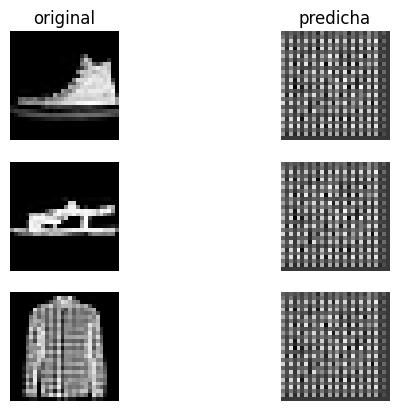

In [73]:
test_model_untrained(Autoencoder, 64, 0.2, valid_set)

# 2

In [13]:
indices = torch.randint(len(valid_set), size=(3,))
indices

tensor([4306, 6175, 8371])

## Modelo original

Epoch 1
-------------------------------
batch=0 loss=0.266636  muestras-procesadas:[    0/60000]
batch=100 loss=0.142019  muestras-procesadas:[10000/60000]
batch=200 loss=0.111635  muestras-procesadas:[20000/60000]
batch=300 loss=0.099088  muestras-procesadas:[30000/60000]
batch=400 loss=0.091963  muestras-procesadas:[40000/60000]
batch=500 loss=0.091581  muestras-procesadas:[50000/60000]
Valid Error: Avg loss: 0.059594 

Valid Error: Avg loss: 0.059587 

Epoch 2
-------------------------------
batch=0 loss=0.088051  muestras-procesadas:[    0/60000]
batch=100 loss=0.085305  muestras-procesadas:[10000/60000]
batch=200 loss=0.083008  muestras-procesadas:[20000/60000]
batch=300 loss=0.092265  muestras-procesadas:[30000/60000]
batch=400 loss=0.085532  muestras-procesadas:[40000/60000]
batch=500 loss=0.079015  muestras-procesadas:[50000/60000]
Valid Error: Avg loss: 0.055804 

Valid Error: Avg loss: 0.055832 

Epoch 3
-------------------------------
batch=0 loss=0.087114  muestras-procesad

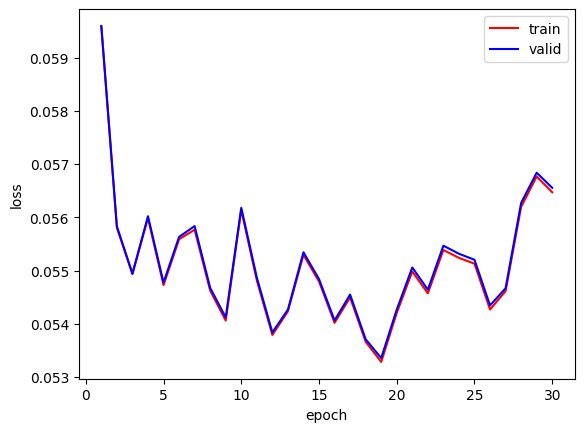

In [130]:
model_orig = model_generator(Autoencoder, 64, 0.2, 30, 100, 'Adam', 1e-3, train_set, valid_set)

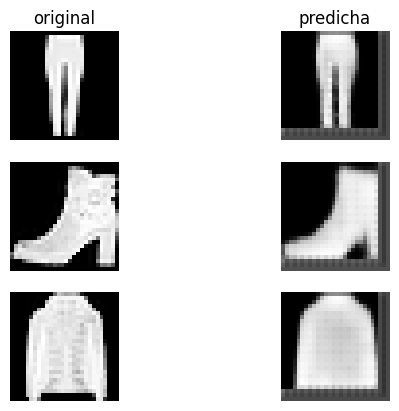

In [10]:
test_model(model_orig, valid_set, indices)

## Variando n

Epoch 1
-------------------------------
batch=0 loss=0.235414  muestras-procesadas:[    0/60000]
batch=100 loss=0.124592  muestras-procesadas:[10000/60000]
batch=200 loss=0.110889  muestras-procesadas:[20000/60000]
batch=300 loss=0.097147  muestras-procesadas:[30000/60000]
batch=400 loss=0.091700  muestras-procesadas:[40000/60000]
batch=500 loss=0.087510  muestras-procesadas:[50000/60000]
Valid Error: Avg loss: 0.057827 

Valid Error: Avg loss: 0.057843 

Epoch 2
-------------------------------
batch=0 loss=0.084537  muestras-procesadas:[    0/60000]
batch=100 loss=0.083816  muestras-procesadas:[10000/60000]
batch=200 loss=0.082612  muestras-procesadas:[20000/60000]
batch=300 loss=0.082892  muestras-procesadas:[30000/60000]
batch=400 loss=0.077633  muestras-procesadas:[40000/60000]
batch=500 loss=0.080045  muestras-procesadas:[50000/60000]
Valid Error: Avg loss: 0.054630 

Valid Error: Avg loss: 0.054677 

Epoch 3
-------------------------------
batch=0 loss=0.081076  muestras-procesad

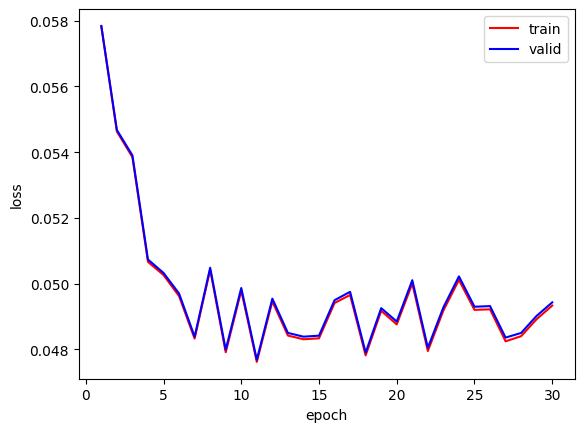

In [12]:
model_128 = model_generator(Autoencoder, 128, 0.2, 30, 100, 'Adam', 1e-3, train_set, valid_set)

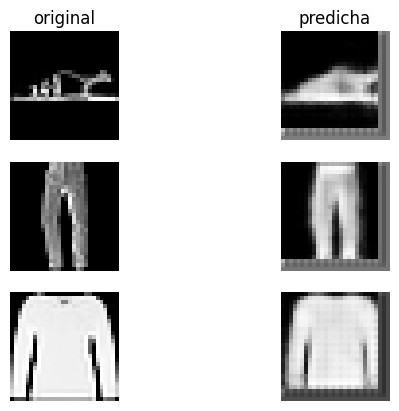

In [14]:
test_model(model_128, valid_set)

Epoch 1
-------------------------------
batch=0 loss=0.202561  muestras-procesadas:[    0/60000]
batch=100 loss=0.111943  muestras-procesadas:[10000/60000]
batch=200 loss=0.095096  muestras-procesadas:[20000/60000]
batch=300 loss=0.092686  muestras-procesadas:[30000/60000]
batch=400 loss=0.083544  muestras-procesadas:[40000/60000]
batch=500 loss=0.080973  muestras-procesadas:[50000/60000]
Valid Error: Avg loss: 0.056786 

Valid Error: Avg loss: 0.056805 

Epoch 2
-------------------------------
batch=0 loss=0.081647  muestras-procesadas:[    0/60000]
batch=100 loss=0.084340  muestras-procesadas:[10000/60000]
batch=200 loss=0.077321  muestras-procesadas:[20000/60000]
batch=300 loss=0.077659  muestras-procesadas:[30000/60000]
batch=400 loss=0.077686  muestras-procesadas:[40000/60000]
batch=500 loss=0.079348  muestras-procesadas:[50000/60000]
Valid Error: Avg loss: 0.052309 

Valid Error: Avg loss: 0.052360 

Epoch 3
-------------------------------
batch=0 loss=0.071805  muestras-procesad

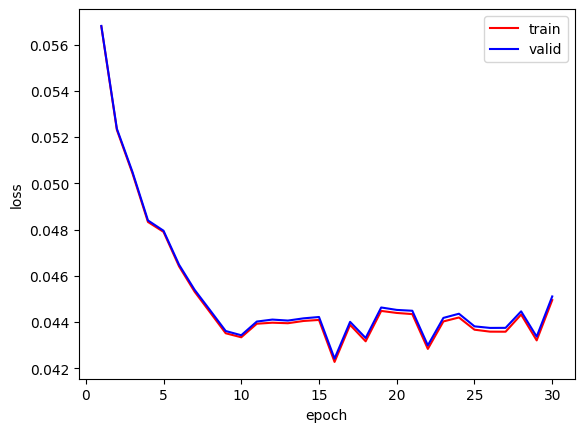

In [15]:
model_256 = model_generator(Autoencoder, 256, 0.2, 30, 100, 'Adam', 1e-3, train_set, valid_set)

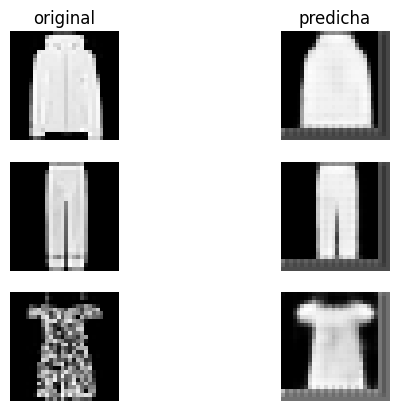

In [22]:
test_model(model_256, valid_set)

Epoch 1
-------------------------------
batch=0 loss=0.210366  muestras-procesadas:[    0/60000]
batch=100 loss=0.116338  muestras-procesadas:[10000/60000]
batch=200 loss=0.098237  muestras-procesadas:[20000/60000]
batch=300 loss=0.091233  muestras-procesadas:[30000/60000]
batch=400 loss=0.086038  muestras-procesadas:[40000/60000]
batch=500 loss=0.078930  muestras-procesadas:[50000/60000]
Valid Error: Avg loss: 0.054560 

Valid Error: Avg loss: 0.054600 

Epoch 2
-------------------------------
batch=0 loss=0.078666  muestras-procesadas:[    0/60000]
batch=100 loss=0.075927  muestras-procesadas:[10000/60000]
batch=200 loss=0.074438  muestras-procesadas:[20000/60000]
batch=300 loss=0.079183  muestras-procesadas:[30000/60000]
batch=400 loss=0.074218  muestras-procesadas:[40000/60000]
batch=500 loss=0.076032  muestras-procesadas:[50000/60000]
Valid Error: Avg loss: 0.052431 

Valid Error: Avg loss: 0.052512 

Epoch 3
-------------------------------
batch=0 loss=0.074701  muestras-procesad

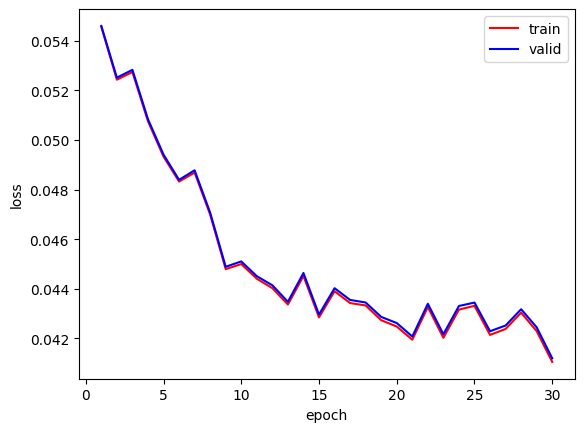

In [23]:
model_512 = model_generator(Autoencoder, 512, 0.2, 30, 100, 'Adam', 1e-3, train_set, valid_set)

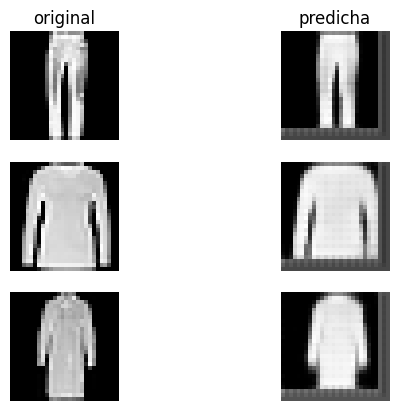

In [25]:
test_model(model_512, valid_set)

Se observa una leve mejora al pasar de 64 a 128 neuronas, no suficiente para justificar la modificacion. 

Por otro lado, al probar el modelo con 256 neuronas si se nota una reduccion de la perdida mas significante, con lo que se puede modificar el modelo original con este parametro. 

Con 512 neuronas nuevamente no se aprecia una mejora, y lo que es mas, a diferencia de los otros modelos en donde con 10 epocas ya eran suficientes para entrenar, en el modelo con 512 neuronas puede necesitarse incluso un numero mayor de epocas de entrenamiento.

## Variando dropout

Epoch 1
-------------------------------
batch=0 loss=0.361958  muestras-procesadas:[    0/60000]
batch=100 loss=0.198428  muestras-procesadas:[10000/60000]
batch=200 loss=0.179108  muestras-procesadas:[20000/60000]
batch=300 loss=0.154298  muestras-procesadas:[30000/60000]
batch=400 loss=0.154661  muestras-procesadas:[40000/60000]
batch=500 loss=0.151845  muestras-procesadas:[50000/60000]
Valid Error: Avg loss: 0.102815 

Valid Error: Avg loss: 0.102820 

Epoch 2
-------------------------------
batch=0 loss=0.143711  muestras-procesadas:[    0/60000]
batch=100 loss=0.149531  muestras-procesadas:[10000/60000]
batch=200 loss=0.130900  muestras-procesadas:[20000/60000]
batch=300 loss=0.142441  muestras-procesadas:[30000/60000]
batch=400 loss=0.135614  muestras-procesadas:[40000/60000]
batch=500 loss=0.141641  muestras-procesadas:[50000/60000]
Valid Error: Avg loss: 0.100844 

Valid Error: Avg loss: 0.100912 

Epoch 3
-------------------------------
batch=0 loss=0.139408  muestras-procesad

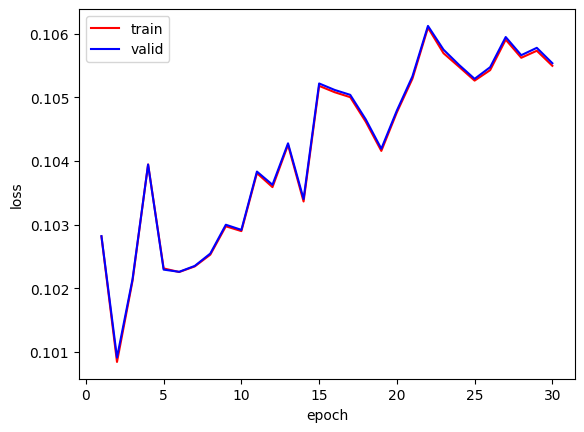

In [58]:
model_drop05 = model_generator(Autoencoder, 256, 0.5, 30, 100, 'Adam', 1e-3, train_set, valid_set)

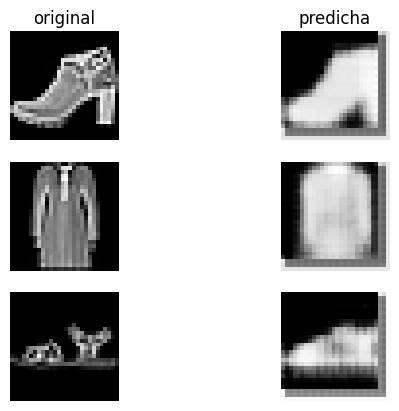

In [52]:
test_model(model_drop05, valid_set)

Epoch 1
-------------------------------
batch=0 loss=0.167984  muestras-procesadas:[    0/60000]
batch=100 loss=0.071712  muestras-procesadas:[10000/60000]
batch=200 loss=0.061573  muestras-procesadas:[20000/60000]
batch=300 loss=0.051847  muestras-procesadas:[30000/60000]
batch=400 loss=0.050291  muestras-procesadas:[40000/60000]
batch=500 loss=0.046617  muestras-procesadas:[50000/60000]
Valid Error: Avg loss: 0.037891 

Valid Error: Avg loss: 0.037975 

Epoch 2
-------------------------------
batch=0 loss=0.046011  muestras-procesadas:[    0/60000]
batch=100 loss=0.047730  muestras-procesadas:[10000/60000]
batch=200 loss=0.046463  muestras-procesadas:[20000/60000]
batch=300 loss=0.041746  muestras-procesadas:[30000/60000]
batch=400 loss=0.042932  muestras-procesadas:[40000/60000]
batch=500 loss=0.042894  muestras-procesadas:[50000/60000]
Valid Error: Avg loss: 0.031721 

Valid Error: Avg loss: 0.031840 

Epoch 3
-------------------------------
batch=0 loss=0.043424  muestras-procesad

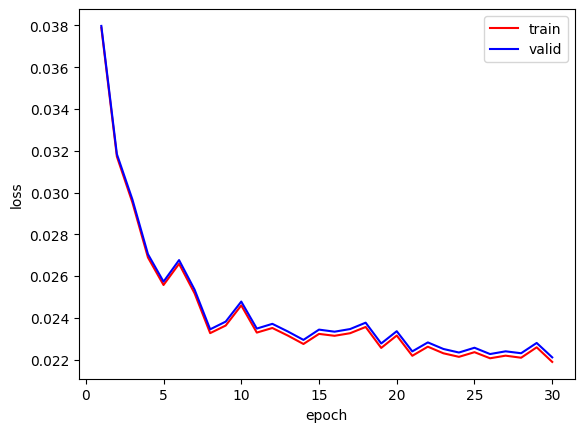

In [59]:
model_256_drop005 = model_generator(Autoencoder, 256, 0.05, 30, 100, 'Adam', 1e-3, train_set, valid_set)

Epoch 1
-------------------------------
batch=0 loss=0.248555  muestras-procesadas:[    0/60000]
batch=100 loss=0.115688  muestras-procesadas:[10000/60000]
batch=200 loss=0.096885  muestras-procesadas:[20000/60000]
batch=300 loss=0.082550  muestras-procesadas:[30000/60000]
batch=400 loss=0.076195  muestras-procesadas:[40000/60000]
batch=500 loss=0.070546  muestras-procesadas:[50000/60000]
Valid Error: Avg loss: 0.048686 

Valid Error: Avg loss: 0.048730 

Epoch 2
-------------------------------
batch=0 loss=0.068996  muestras-procesadas:[    0/60000]
batch=100 loss=0.069798  muestras-procesadas:[10000/60000]
batch=200 loss=0.067640  muestras-procesadas:[20000/60000]
batch=300 loss=0.061550  muestras-procesadas:[30000/60000]
batch=400 loss=0.062483  muestras-procesadas:[40000/60000]
batch=500 loss=0.063078  muestras-procesadas:[50000/60000]
Valid Error: Avg loss: 0.043359 

Valid Error: Avg loss: 0.043445 

Epoch 3
-------------------------------
batch=0 loss=0.062531  muestras-procesad

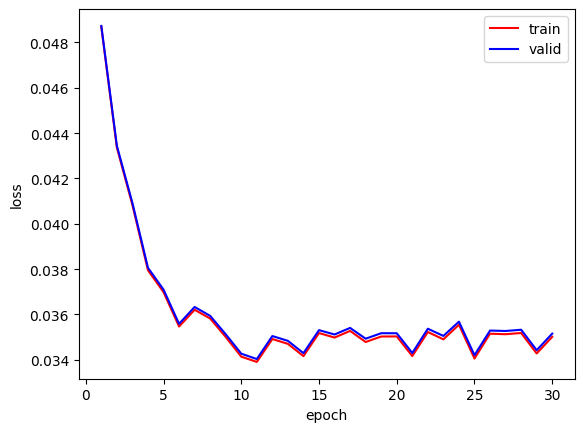

In [60]:
model_64_drop01 = model_generator(Autoencoder, 64, 0.1, 30, 100, 'Adam', 1e-3, train_set, valid_set)

Epoch 1
-------------------------------
batch=0 loss=0.224187  muestras-procesadas:[    0/60000]
batch=100 loss=0.107685  muestras-procesadas:[10000/60000]
batch=200 loss=0.083436  muestras-procesadas:[20000/60000]
batch=300 loss=0.074644  muestras-procesadas:[30000/60000]
batch=400 loss=0.061987  muestras-procesadas:[40000/60000]
batch=500 loss=0.067219  muestras-procesadas:[50000/60000]
Valid Error: Avg loss: 0.046296 

Valid Error: Avg loss: 0.046380 

Epoch 2
-------------------------------
batch=0 loss=0.064270  muestras-procesadas:[    0/60000]
batch=100 loss=0.059854  muestras-procesadas:[10000/60000]
batch=200 loss=0.060472  muestras-procesadas:[20000/60000]
batch=300 loss=0.059653  muestras-procesadas:[30000/60000]
batch=400 loss=0.056021  muestras-procesadas:[40000/60000]
batch=500 loss=0.056159  muestras-procesadas:[50000/60000]
Valid Error: Avg loss: 0.038728 

Valid Error: Avg loss: 0.038852 

Epoch 3
-------------------------------
batch=0 loss=0.058520  muestras-procesad

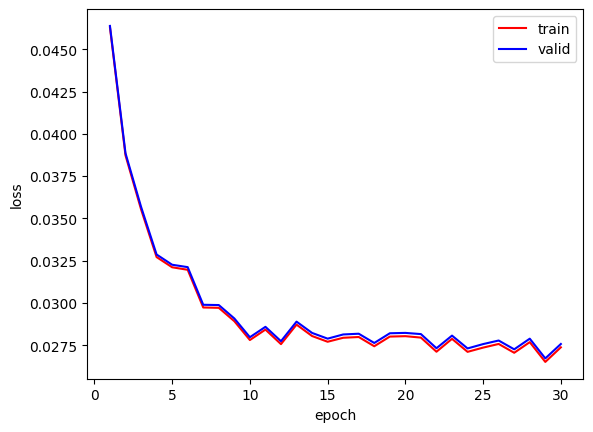

In [125]:
model_drop01 = model_generator(Autoencoder, 256, 0.1, 30, 100, 'Adam', 1e-3, train_set, valid_set)

Usando un dropout de 0.1, con 256 neuronas, se observa una mejora significante respecto a cuando se usa un dropout de 0.2, lo cual es logico, pero ademas tampoco se llega a una situacion de overfitting.

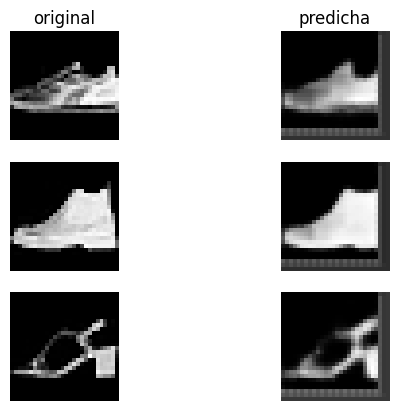

In [31]:
test_model(model_drop01, valid_set, indices)

## Variando optimizador

Epoch 1
-------------------------------
batch=0 loss=0.173766  muestras-procesadas:[    0/60000]
batch=100 loss=0.174656  muestras-procesadas:[10000/60000]
batch=200 loss=0.170370  muestras-procesadas:[20000/60000]
batch=300 loss=0.172796  muestras-procesadas:[30000/60000]
batch=400 loss=0.179658  muestras-procesadas:[40000/60000]
batch=500 loss=0.174053  muestras-procesadas:[50000/60000]
Valid Error: Avg loss: 0.148939 

Valid Error: Avg loss: 0.148277 

Epoch 2
-------------------------------
batch=0 loss=0.164189  muestras-procesadas:[    0/60000]
batch=100 loss=0.168438  muestras-procesadas:[10000/60000]
batch=200 loss=0.170970  muestras-procesadas:[20000/60000]
batch=300 loss=0.170983  muestras-procesadas:[30000/60000]
batch=400 loss=0.163263  muestras-procesadas:[40000/60000]
batch=500 loss=0.166391  muestras-procesadas:[50000/60000]
Valid Error: Avg loss: 0.144578 

Valid Error: Avg loss: 0.143939 

Epoch 3
-------------------------------
batch=0 loss=0.163757  muestras-procesad

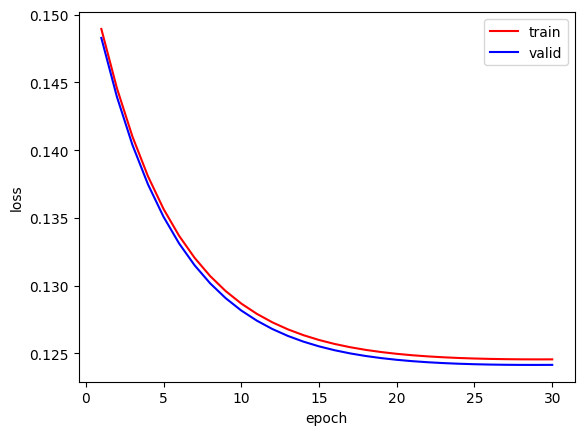

In [77]:
model_drop01_sgd = model_generator(Autoencoder, 256, 0.1, 30, 100, 'SGD', 1e-3, train_set, valid_set)

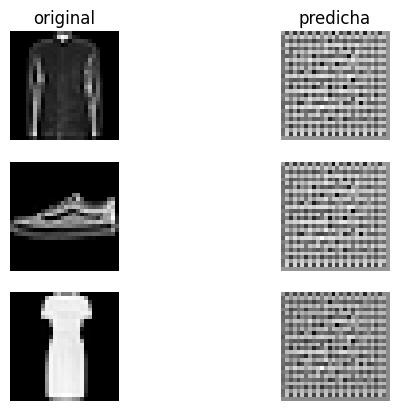

In [78]:
test_model(model_drop01_sgd, valid_set, indices)

Epoch 1
-------------------------------
batch=0 loss=0.215506  muestras-procesadas:[    0/60000]
batch=100 loss=0.217037  muestras-procesadas:[10000/60000]
batch=200 loss=0.212198  muestras-procesadas:[20000/60000]
batch=300 loss=0.208003  muestras-procesadas:[30000/60000]
batch=400 loss=0.206150  muestras-procesadas:[40000/60000]
batch=500 loss=0.201248  muestras-procesadas:[50000/60000]
Valid Error: Avg loss: 0.151822 

Valid Error: Avg loss: 0.151151 

Epoch 2
-------------------------------
batch=0 loss=0.205245  muestras-procesadas:[    0/60000]
batch=100 loss=0.208593  muestras-procesadas:[10000/60000]
batch=200 loss=0.198852  muestras-procesadas:[20000/60000]
batch=300 loss=0.196885  muestras-procesadas:[30000/60000]
batch=400 loss=0.189323  muestras-procesadas:[40000/60000]
batch=500 loss=0.194563  muestras-procesadas:[50000/60000]
Valid Error: Avg loss: 0.145416 

Valid Error: Avg loss: 0.144781 

Epoch 3
-------------------------------
batch=0 loss=0.191605  muestras-procesad

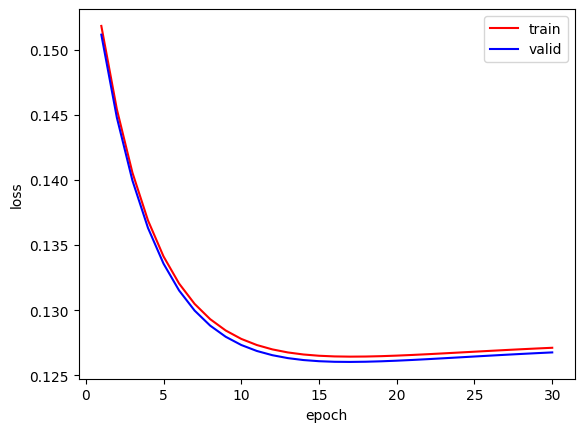

In [79]:
model_sgd = model_generator(Autoencoder, 64, 0.2, 30, 100, 'SGD', 1e-3, train_set, valid_set)

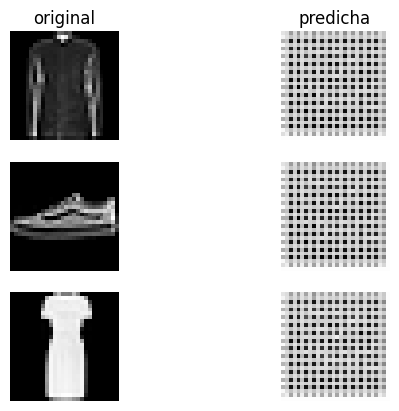

In [80]:
test_model(model_sgd, valid_set, indices)

Epoch 1
-------------------------------
batch=0 loss=0.204395  muestras-procesadas:[    0/60000]
batch=100 loss=0.199809  muestras-procesadas:[10000/60000]
batch=200 loss=0.203459  muestras-procesadas:[20000/60000]
batch=300 loss=0.200219  muestras-procesadas:[30000/60000]
batch=400 loss=0.200049  muestras-procesadas:[40000/60000]
batch=500 loss=0.209217  muestras-procesadas:[50000/60000]
Valid Error: Avg loss: 0.183585 

Valid Error: Avg loss: 0.182785 

Epoch 2
-------------------------------
batch=0 loss=0.205437  muestras-procesadas:[    0/60000]
batch=100 loss=0.200926  muestras-procesadas:[10000/60000]
batch=200 loss=0.197863  muestras-procesadas:[20000/60000]
batch=300 loss=0.192557  muestras-procesadas:[30000/60000]
batch=400 loss=0.191063  muestras-procesadas:[40000/60000]
batch=500 loss=0.197131  muestras-procesadas:[50000/60000]
Valid Error: Avg loss: 0.174245 

Valid Error: Avg loss: 0.173478 

Epoch 3
-------------------------------
batch=0 loss=0.192299  muestras-procesad

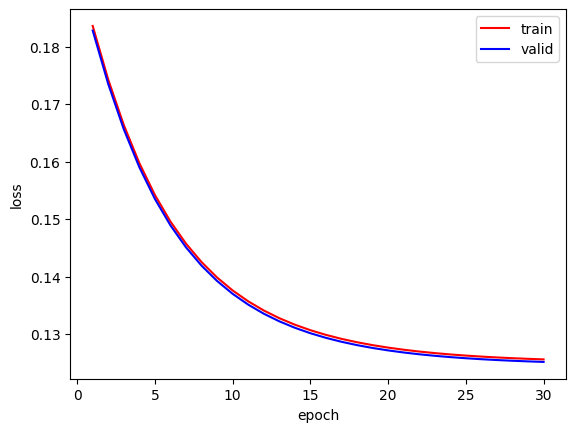

In [81]:
model_sgd = model_generator(Autoencoder, 256, 0.05, 30, 100, 'SGD', 1e-3, train_set, valid_set)

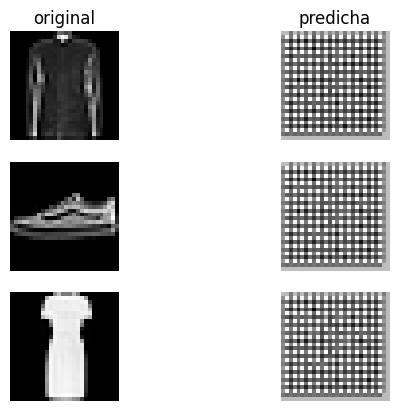

In [82]:
test_model(model_sgd, valid_set, indices)

El optimizador SGD tarda mas en converger, y lo hace con un mayor error en la funcion perdida

## Variando learning rate

Epoch 1
-------------------------------
batch=0 loss=0.195648  muestras-procesadas:[    0/60000]
batch=100 loss=0.196992  muestras-procesadas:[10000/60000]
batch=200 loss=0.199291  muestras-procesadas:[20000/60000]
batch=300 loss=0.198391  muestras-procesadas:[30000/60000]
batch=400 loss=0.191956  muestras-procesadas:[40000/60000]
batch=500 loss=0.193009  muestras-procesadas:[50000/60000]
Valid Error: Avg loss: 0.201961 

Valid Error: Avg loss: 0.201926 

Epoch 2
-------------------------------
batch=0 loss=0.191590  muestras-procesadas:[    0/60000]
batch=100 loss=0.195112  muestras-procesadas:[10000/60000]
batch=200 loss=0.215304  muestras-procesadas:[20000/60000]
batch=300 loss=0.200401  muestras-procesadas:[30000/60000]
batch=400 loss=0.197222  muestras-procesadas:[40000/60000]
batch=500 loss=0.207603  muestras-procesadas:[50000/60000]
Valid Error: Avg loss: 0.202891 

Valid Error: Avg loss: 0.202816 

Epoch 3
-------------------------------
batch=0 loss=0.203554  muestras-procesad

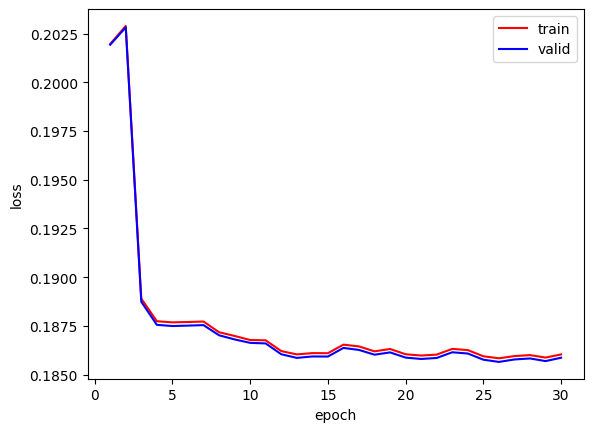

In [62]:
model_lr01 = model_generator(Autoencoder, 256, 0.1, 30, 100, 'Adam', 0.1, train_set, valid_set)

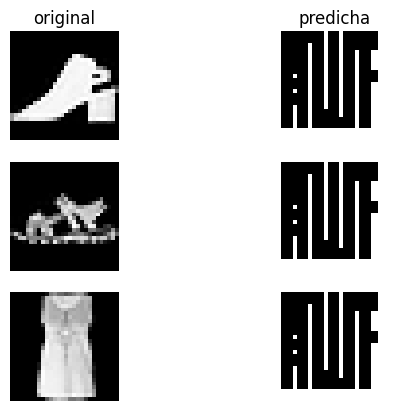

In [66]:
test_model(model_lr01, valid_set)

Epoch 1
-------------------------------
batch=0 loss=0.192047  muestras-procesadas:[    0/60000]
batch=100 loss=0.196784  muestras-procesadas:[10000/60000]
batch=200 loss=0.191973  muestras-procesadas:[20000/60000]
batch=300 loss=0.181907  muestras-procesadas:[30000/60000]
batch=400 loss=0.167584  muestras-procesadas:[40000/60000]
batch=500 loss=0.161861  muestras-procesadas:[50000/60000]
Valid Error: Avg loss: 0.133908 

Valid Error: Avg loss: 0.133295 

Epoch 2
-------------------------------
batch=0 loss=0.148920  muestras-procesadas:[    0/60000]
batch=100 loss=0.148640  muestras-procesadas:[10000/60000]
batch=200 loss=0.142624  muestras-procesadas:[20000/60000]
batch=300 loss=0.139164  muestras-procesadas:[30000/60000]
batch=400 loss=0.140019  muestras-procesadas:[40000/60000]
batch=500 loss=0.137828  muestras-procesadas:[50000/60000]
Valid Error: Avg loss: 0.111358 

Valid Error: Avg loss: 0.110802 

Epoch 3
-------------------------------
batch=0 loss=0.129005  muestras-procesad

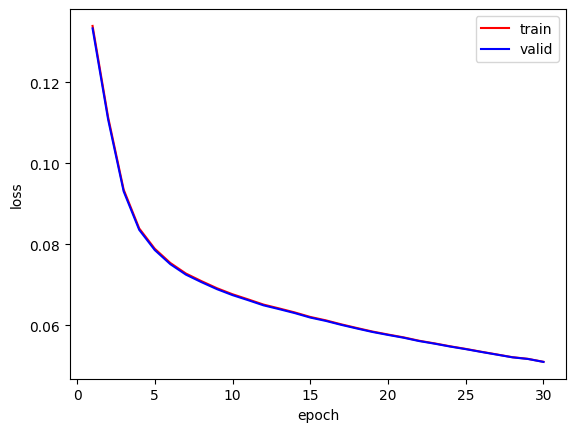

In [70]:
model_lr1e5 = model_generator(Autoencoder, 256, 0.1, 30, 100, 'Adam', 1e-5, train_set, valid_set)

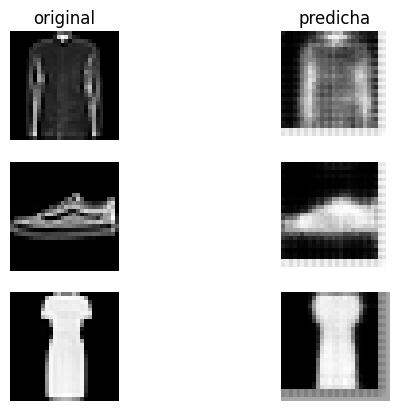

In [72]:
test_model(model_lr1e5, valid_set, indices)

Epoch 1
-------------------------------
batch=0 loss=0.248693  muestras-procesadas:[    0/60000]
batch=100 loss=0.240914  muestras-procesadas:[10000/60000]
batch=200 loss=0.252551  muestras-procesadas:[20000/60000]
batch=300 loss=0.253717  muestras-procesadas:[30000/60000]
batch=400 loss=0.243818  muestras-procesadas:[40000/60000]
batch=500 loss=0.242351  muestras-procesadas:[50000/60000]
Valid Error: Avg loss: 0.209767 

Valid Error: Avg loss: 0.208887 

Epoch 2
-------------------------------
batch=0 loss=0.249293  muestras-procesadas:[    0/60000]
batch=100 loss=0.237579  muestras-procesadas:[10000/60000]
batch=200 loss=0.245415  muestras-procesadas:[20000/60000]
batch=300 loss=0.240797  muestras-procesadas:[30000/60000]
batch=400 loss=0.247225  muestras-procesadas:[40000/60000]
batch=500 loss=0.245634  muestras-procesadas:[50000/60000]
Valid Error: Avg loss: 0.208918 

Valid Error: Avg loss: 0.208040 

Epoch 3
-------------------------------
batch=0 loss=0.245507  muestras-procesad

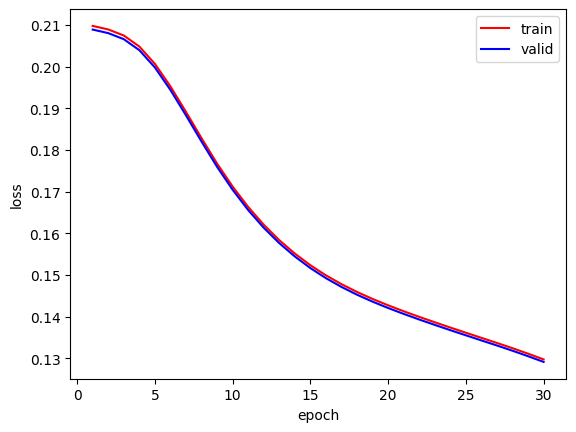

In [71]:
model_lr1e6 = model_generator(Autoencoder, 256, 0.1, 30, 100, 'Adam', 1e-6, train_set, valid_set)

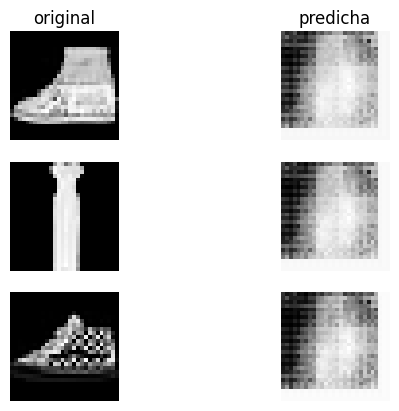

In [72]:
test_model(model_lr1e6, valid_set)

Epoch 1
-------------------------------
batch=0 loss=0.182687  muestras-procesadas:[    0/60000]
batch=100 loss=0.155822  muestras-procesadas:[10000/60000]
batch=200 loss=0.125046  muestras-procesadas:[20000/60000]
batch=300 loss=0.105005  muestras-procesadas:[30000/60000]
batch=400 loss=0.098190  muestras-procesadas:[40000/60000]
batch=500 loss=0.091440  muestras-procesadas:[50000/60000]
Valid Error: Avg loss: 0.067939 

Valid Error: Avg loss: 0.067704 

Epoch 2
-------------------------------
batch=0 loss=0.087612  muestras-procesadas:[    0/60000]
batch=100 loss=0.086200  muestras-procesadas:[10000/60000]
batch=200 loss=0.085523  muestras-procesadas:[20000/60000]
batch=300 loss=0.082641  muestras-procesadas:[30000/60000]
batch=400 loss=0.079119  muestras-procesadas:[40000/60000]
batch=500 loss=0.081647  muestras-procesadas:[50000/60000]
Valid Error: Avg loss: 0.059036 

Valid Error: Avg loss: 0.058895 

Epoch 3
-------------------------------
batch=0 loss=0.079037  muestras-procesad

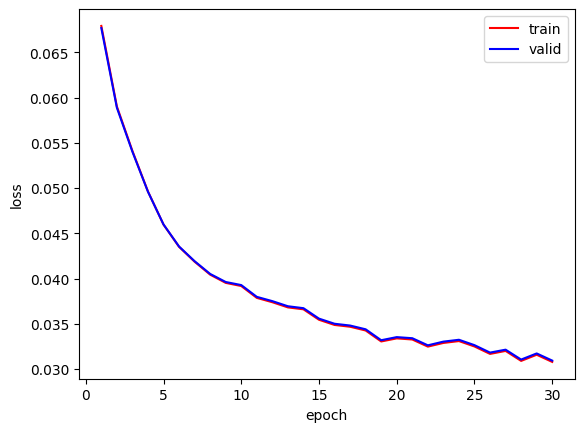

In [73]:
model_lr1e4 = model_generator(Autoencoder, 256, 0.1, 30, 100, 'Adam', 1e-4, train_set, valid_set)

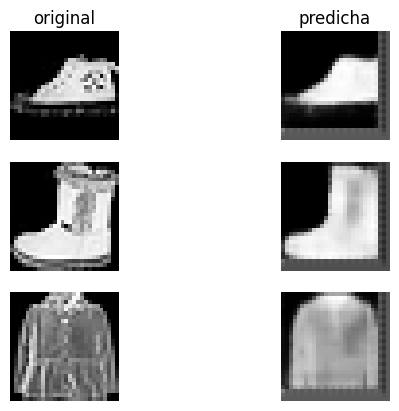

In [74]:
test_model(model_lr1e4, valid_set)

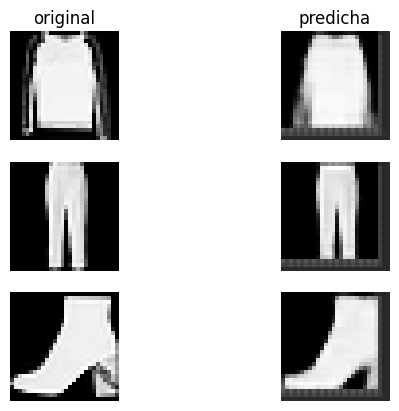

In [76]:
test_model(model_lr5e4, valid_set)

Epoch 1
-------------------------------
batch=0 loss=0.166195  muestras-procesadas:[    0/60000]
batch=100 loss=0.086581  muestras-procesadas:[10000/60000]
batch=200 loss=0.070489  muestras-procesadas:[20000/60000]
batch=300 loss=0.064997  muestras-procesadas:[30000/60000]
batch=400 loss=0.071548  muestras-procesadas:[40000/60000]
batch=500 loss=0.070988  muestras-procesadas:[50000/60000]
Valid Error: Avg loss: 0.049188 

Valid Error: Avg loss: 0.049124 

Epoch 2
-------------------------------
batch=0 loss=0.065778  muestras-procesadas:[    0/60000]
batch=100 loss=0.067431  muestras-procesadas:[10000/60000]
batch=200 loss=0.071700  muestras-procesadas:[20000/60000]
batch=300 loss=0.067745  muestras-procesadas:[30000/60000]
batch=400 loss=0.062348  muestras-procesadas:[40000/60000]
batch=500 loss=0.065990  muestras-procesadas:[50000/60000]
Valid Error: Avg loss: 0.045838 

Valid Error: Avg loss: 0.045814 

Epoch 3
-------------------------------
batch=0 loss=0.066516  muestras-procesad

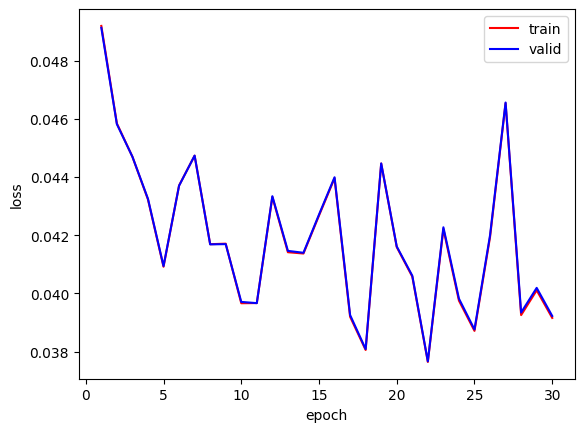

In [79]:
model_lr5e2 = model_generator(Autoencoder, 256, 0.1, 30, 100, 'Adam', 5e-2, train_set, valid_set)

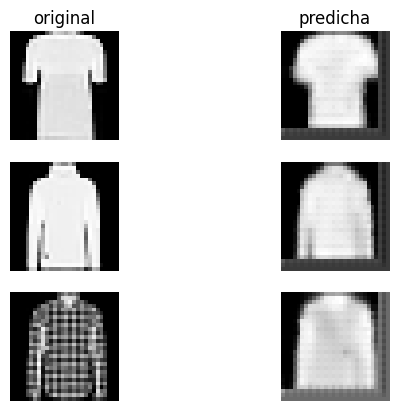

In [80]:
test_model(model_lr5e2, valid_set)

Epoch 1
-------------------------------
batch=0 loss=0.211710  muestras-procesadas:[    0/60000]
batch=100 loss=0.111081  muestras-procesadas:[10000/60000]
batch=200 loss=0.091146  muestras-procesadas:[20000/60000]
batch=300 loss=0.084157  muestras-procesadas:[30000/60000]
batch=400 loss=0.078875  muestras-procesadas:[40000/60000]
batch=500 loss=0.073277  muestras-procesadas:[50000/60000]
Valid Error: Avg loss: 0.051248 

Valid Error: Avg loss: 0.051213 

Epoch 2
-------------------------------
batch=0 loss=0.067656  muestras-procesadas:[    0/60000]
batch=100 loss=0.064480  muestras-procesadas:[10000/60000]
batch=200 loss=0.061313  muestras-procesadas:[20000/60000]
batch=300 loss=0.062765  muestras-procesadas:[30000/60000]
batch=400 loss=0.060533  muestras-procesadas:[40000/60000]
batch=500 loss=0.061597  muestras-procesadas:[50000/60000]
Valid Error: Avg loss: 0.043712 

Valid Error: Avg loss: 0.043791 

Epoch 3
-------------------------------
batch=0 loss=0.060077  muestras-procesad

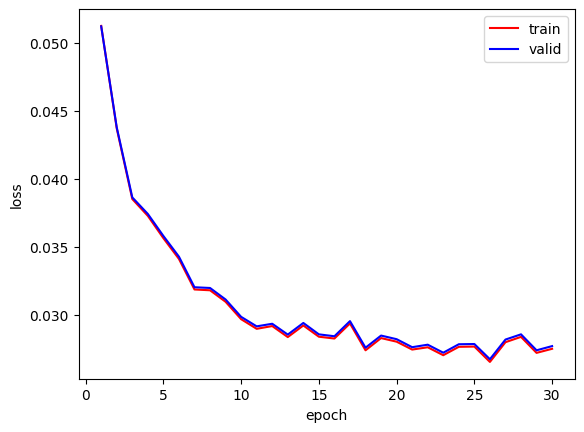

In [75]:
model_lr5e4 = model_generator(Autoencoder, 256, 0.1, 30, 100, 'Adam', 5e-4, train_set, valid_set)

Cuando se aumenta o disminuye levemente el learning rate no se obtienen mejores resultados, por lo que no parece indicado modificar discho hiperparametro.

## Variando numero de batchs

Epoch 1
-------------------------------
batch=0 loss=0.187794  muestras-procesadas:[    0/60000]
batch=10 loss=0.172357  muestras-procesadas:[10000/60000]
batch=20 loss=0.144095  muestras-procesadas:[20000/60000]
batch=30 loss=0.126635  muestras-procesadas:[30000/60000]
batch=40 loss=0.115918  muestras-procesadas:[40000/60000]
batch=50 loss=0.106976  muestras-procesadas:[50000/60000]
Valid Error: Avg loss: 0.079591 

Valid Error: Avg loss: 0.079279 

Epoch 2
-------------------------------
batch=0 loss=0.099871  muestras-procesadas:[    0/60000]
batch=10 loss=0.095469  muestras-procesadas:[10000/60000]
batch=20 loss=0.090953  muestras-procesadas:[20000/60000]
batch=30 loss=0.088445  muestras-procesadas:[30000/60000]
batch=40 loss=0.085499  muestras-procesadas:[40000/60000]
batch=50 loss=0.084453  muestras-procesadas:[50000/60000]
Valid Error: Avg loss: 0.061667 

Valid Error: Avg loss: 0.061453 

Epoch 3
-------------------------------
batch=0 loss=0.080902  muestras-procesadas:[    0/

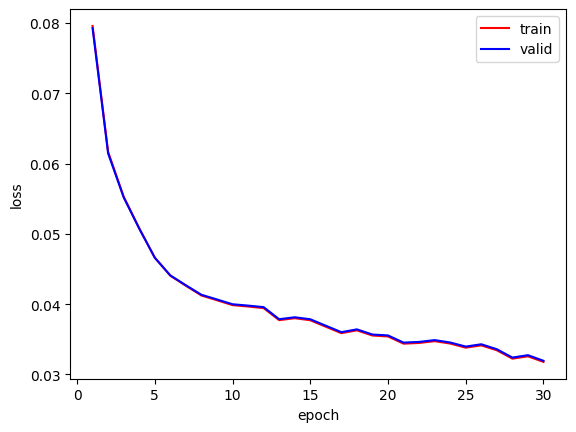

In [81]:
model_b1000 = model_generator(Autoencoder, 256, 0.1, 30, 1000, 'Adam', 1e-3, train_set, valid_set)

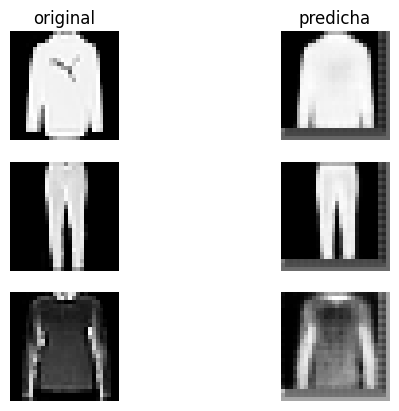

In [82]:
test_model(model_b1000, valid_set)

Epoch 1
-------------------------------
batch=0 loss=0.218379  muestras-procesadas:[    0/60000]
batch=200 loss=0.089962  muestras-procesadas:[10000/60000]
batch=400 loss=0.069577  muestras-procesadas:[20000/60000]
batch=600 loss=0.065654  muestras-procesadas:[30000/60000]
batch=800 loss=0.059648  muestras-procesadas:[40000/60000]
batch=1000 loss=0.064777  muestras-procesadas:[50000/60000]
Valid Error: Avg loss: 0.040976 

Valid Error: Avg loss: 0.041083 

Epoch 2
-------------------------------
batch=0 loss=0.052106  muestras-procesadas:[    0/60000]
batch=200 loss=0.056053  muestras-procesadas:[10000/60000]
batch=400 loss=0.058220  muestras-procesadas:[20000/60000]
batch=600 loss=0.048173  muestras-procesadas:[30000/60000]
batch=800 loss=0.052989  muestras-procesadas:[40000/60000]
batch=1000 loss=0.049502  muestras-procesadas:[50000/60000]
Valid Error: Avg loss: 0.032805 

Valid Error: Avg loss: 0.032925 

Epoch 3
-------------------------------
batch=0 loss=0.053764  muestras-proces

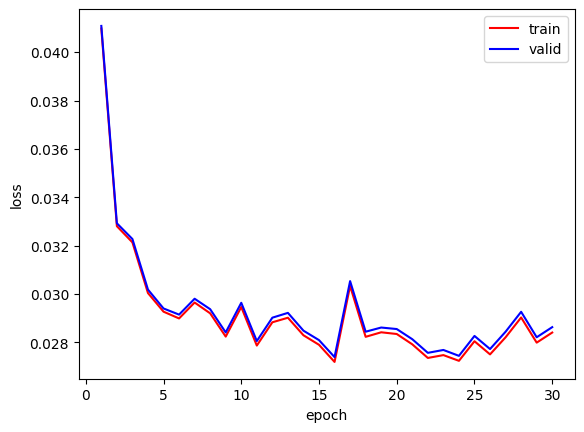

In [83]:
model_b50 = model_generator(Autoencoder, 256, 0.1, 30, 50, 'Adam', 1e-3, train_set, valid_set)

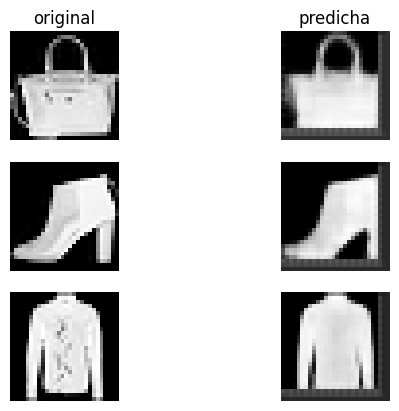

In [84]:
test_model(model_b50, valid_set)

Epoch 1
-------------------------------
batch=0 loss=0.184678  muestras-procesadas:[    0/60000]
batch=1000 loss=0.052094  muestras-procesadas:[10000/60000]
batch=2000 loss=0.049507  muestras-procesadas:[20000/60000]
batch=3000 loss=0.053137  muestras-procesadas:[30000/60000]
batch=4000 loss=0.053703  muestras-procesadas:[40000/60000]
batch=5000 loss=0.049845  muestras-procesadas:[50000/60000]
Valid Error: Avg loss: 0.031536 

Valid Error: Avg loss: 0.031656 

Epoch 2
-------------------------------
batch=0 loss=0.039051  muestras-procesadas:[    0/60000]
batch=1000 loss=0.050560  muestras-procesadas:[10000/60000]
batch=2000 loss=0.047866  muestras-procesadas:[20000/60000]
batch=3000 loss=0.038769  muestras-procesadas:[30000/60000]
batch=4000 loss=0.052074  muestras-procesadas:[40000/60000]
batch=5000 loss=0.052047  muestras-procesadas:[50000/60000]
Valid Error: Avg loss: 0.030463 

Valid Error: Avg loss: 0.030595 

Epoch 3
-------------------------------
batch=0 loss=0.043173  muestra

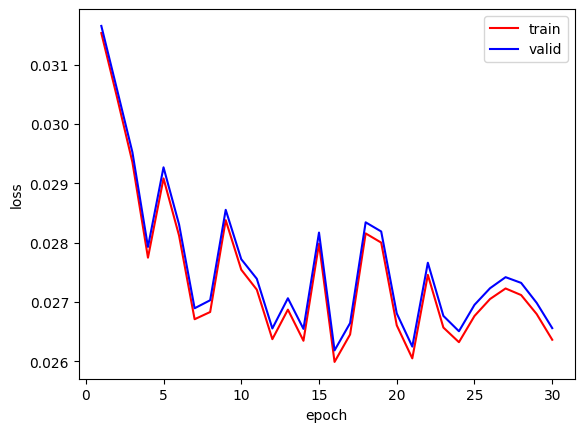

In [83]:
# 40 minutos
model_b10 = model_generator(Autoencoder, 256, 0.1, 30, 10, 'Adam', 1e-3, train_set, valid_set)

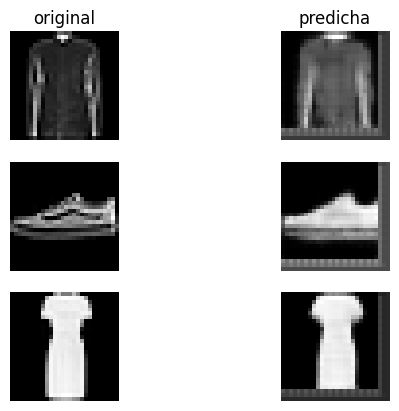

In [84]:
test_model(model_b10, valid_set, indices)

Epoch 1
-------------------------------
batch=0 loss=0.208354  muestras-procesadas:[    0/60000]
batch=10 loss=0.207255  muestras-procesadas:[10000/60000]
batch=20 loss=0.204799  muestras-procesadas:[20000/60000]
batch=30 loss=0.206859  muestras-procesadas:[30000/60000]
batch=40 loss=0.205714  muestras-procesadas:[40000/60000]
batch=50 loss=0.202719  muestras-procesadas:[50000/60000]
Valid Error: Avg loss: 0.171640 

Valid Error: Avg loss: 0.170879 

Epoch 2
-------------------------------
batch=0 loss=0.201697  muestras-procesadas:[    0/60000]
batch=10 loss=0.194942  muestras-procesadas:[10000/60000]
batch=20 loss=0.188794  muestras-procesadas:[20000/60000]
batch=30 loss=0.185385  muestras-procesadas:[30000/60000]
batch=40 loss=0.177410  muestras-procesadas:[40000/60000]
batch=50 loss=0.175127  muestras-procesadas:[50000/60000]
Valid Error: Avg loss: 0.143047 

Valid Error: Avg loss: 0.142413 

Epoch 3
-------------------------------
batch=0 loss=0.168895  muestras-procesadas:[    0/

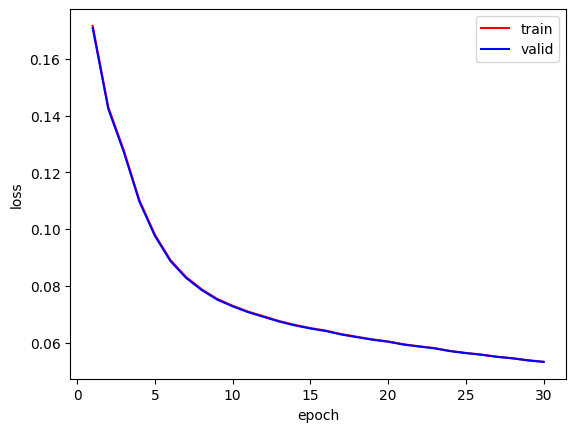

In [101]:
model_b1000_lr1e4 = model_generator(Autoencoder, 256, 0.1, 30, 1000, 'Adam', 1e-4, train_set, valid_set)

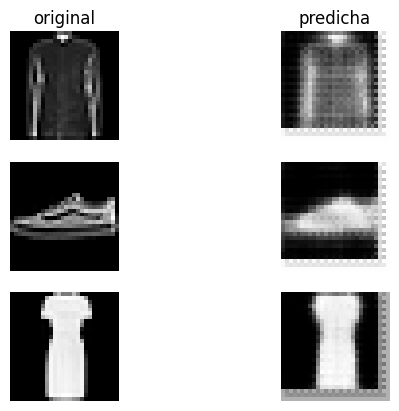

In [102]:
test_model(model_b1000_lr1e4, valid_set, indices)

Epoch 1
-------------------------------
batch=0 loss=0.172553  muestras-procesadas:[    0/60000]
batch=200 loss=0.133001  muestras-procesadas:[10000/60000]
batch=400 loss=0.092767  muestras-procesadas:[20000/60000]
batch=600 loss=0.091366  muestras-procesadas:[30000/60000]
batch=800 loss=0.079162  muestras-procesadas:[40000/60000]
batch=1000 loss=0.083059  muestras-procesadas:[50000/60000]
Valid Error: Avg loss: 0.057043 

Valid Error: Avg loss: 0.056910 

Epoch 2
-------------------------------
batch=0 loss=0.071958  muestras-procesadas:[    0/60000]
batch=200 loss=0.075396  muestras-procesadas:[10000/60000]
batch=400 loss=0.069890  muestras-procesadas:[20000/60000]
batch=600 loss=0.070966  muestras-procesadas:[30000/60000]
batch=800 loss=0.066338  muestras-procesadas:[40000/60000]
batch=1000 loss=0.062192  muestras-procesadas:[50000/60000]
Valid Error: Avg loss: 0.047246 

Valid Error: Avg loss: 0.047223 

Epoch 3
-------------------------------
batch=0 loss=0.061224  muestras-proces

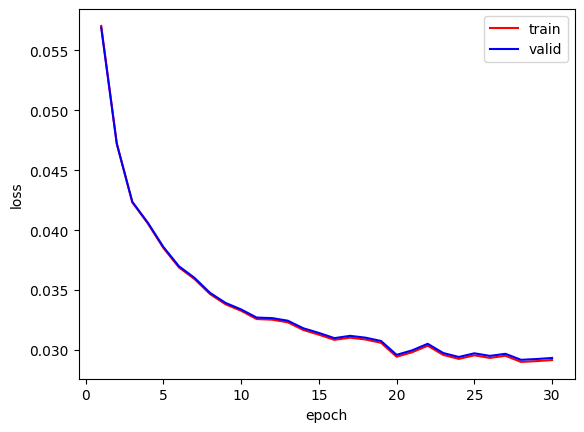

In [103]:
model_b50_lr1e4 = model_generator(Autoencoder, 256, 0.1, 30, 50, 'Adam', 1e-4, train_set, valid_set)

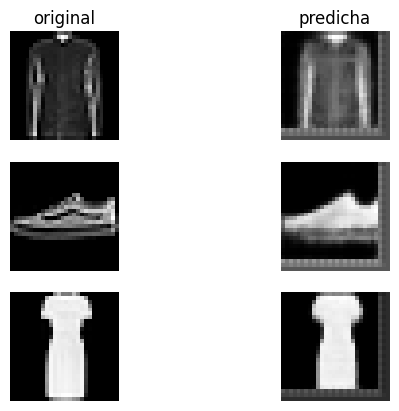

In [104]:
test_model(model_b50_lr1e4, valid_set, indices)

Epoch 1
-------------------------------
batch=0 loss=0.253666  muestras-procesadas:[    0/60000]
batch=200 loss=0.064779  muestras-procesadas:[10000/60000]
batch=400 loss=0.065084  muestras-procesadas:[20000/60000]
batch=600 loss=0.051933  muestras-procesadas:[30000/60000]
batch=800 loss=0.048795  muestras-procesadas:[40000/60000]
batch=1000 loss=0.054034  muestras-procesadas:[50000/60000]
Valid Error: Avg loss: 0.038998 

Valid Error: Avg loss: 0.039121 

Epoch 2
-------------------------------
batch=0 loss=0.051371  muestras-procesadas:[    0/60000]
batch=200 loss=0.050853  muestras-procesadas:[10000/60000]
batch=400 loss=0.046308  muestras-procesadas:[20000/60000]
batch=600 loss=0.055446  muestras-procesadas:[30000/60000]
batch=800 loss=0.048020  muestras-procesadas:[40000/60000]
batch=1000 loss=0.051750  muestras-procesadas:[50000/60000]
Valid Error: Avg loss: 0.035447 

Valid Error: Avg loss: 0.035598 

Epoch 3
-------------------------------
batch=0 loss=0.048132  muestras-proces

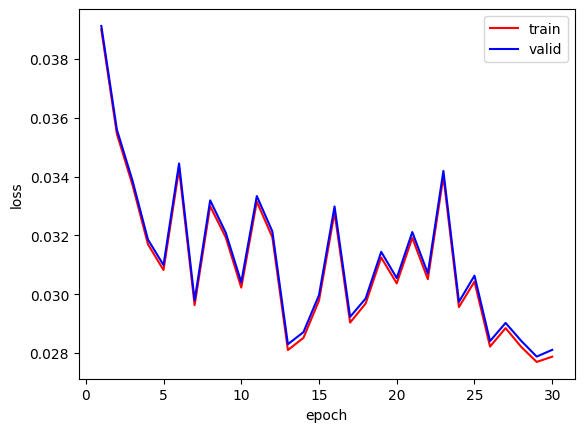

In [112]:
model_b50_lr1e2 = model_generator(Autoencoder, 256, 0.1, 30, 50, 'Adam', 1e-2, train_set, valid_set)

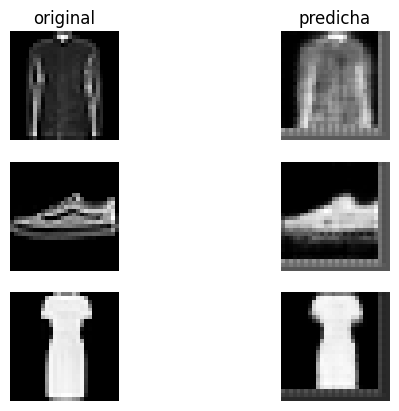

In [113]:
test_model(model_b50_lr1e2, valid_set, indices)

# 3

Clasificador heredando el encoder ya entrenado anteriormente

In [121]:
class Classifier_Conv(nn.Module):
    def __init__(self, n, encoder, p=0.2):
        super(Classifier_Conv, self).__init__()
        self.flatten = nn.Flatten()
        self.encoder = copy.deepcopy(encoder)
        self.classifier = nn.Sequential(
            # Linear
            nn.Linear(n, 10),  # fully connected n -> 32*5*5
            nn.ReLU(),
            nn.Dropout(p)
        ) 
    def forward(self, x):
        x = self.encoder(x)
        x = self.classifier(x)
        return x

## Clasificador usando el encoder del modelo original

Epoch 1
-------------------------------
batch=0 loss=2.390063  muestras-procesadas:[    0/60000]
batch=100 loss=1.277779  muestras-procesadas:[10000/60000]
batch=200 loss=1.087229  muestras-procesadas:[20000/60000]
batch=300 loss=1.108932  muestras-procesadas:[30000/60000]
batch=400 loss=1.042041  muestras-procesadas:[40000/60000]
batch=500 loss=1.105305  muestras-procesadas:[50000/60000]
Test Error: 
 Accuracy: 83.3%, Avg loss: 0.745982 

Test Error: 
 Accuracy: 82.6%, Avg loss: 0.764716 

Epoch 2
-------------------------------
batch=0 loss=0.998675  muestras-procesadas:[    0/60000]
batch=100 loss=0.862433  muestras-procesadas:[10000/60000]
batch=200 loss=1.203767  muestras-procesadas:[20000/60000]
batch=300 loss=1.043791  muestras-procesadas:[30000/60000]
batch=400 loss=0.998339  muestras-procesadas:[40000/60000]
batch=500 loss=0.973830  muestras-procesadas:[50000/60000]
Test Error: 
 Accuracy: 85.7%, Avg loss: 0.682323 

Test Error: 
 Accuracy: 84.4%, Avg loss: 0.703702 

Epoch 3


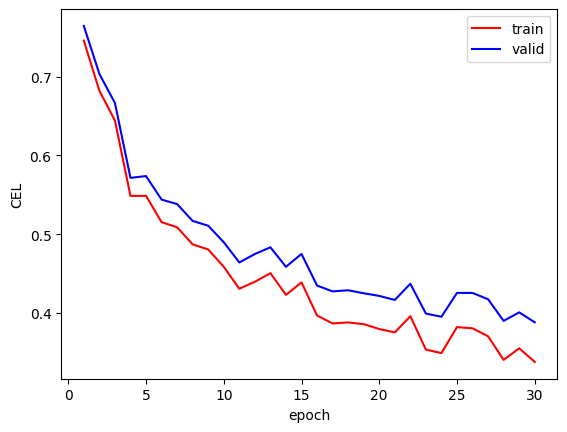

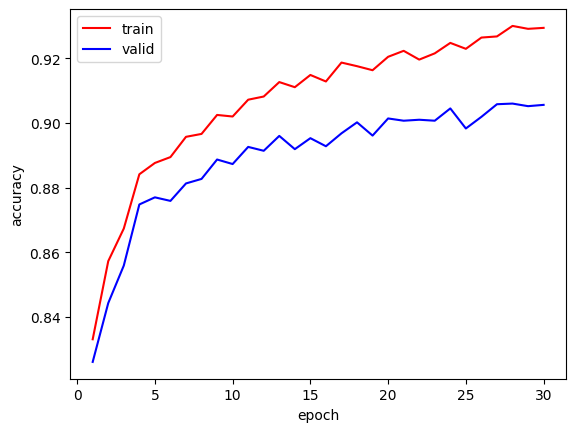

c:\Users\julian\OneDrive\Documentos\Facultad\Redes Neuronales\Practico\classifier.py:162: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.int8)


              precision    recall  f1-score   support

     T-Shirt       0.86      0.84      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.84      0.87      0.85      1000
       Dress       0.91      0.91      0.91      1000
        Coat       0.88      0.82      0.85      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.71      0.74      0.72      1000
     Sneaker       0.95      0.98      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle Boot       0.99      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



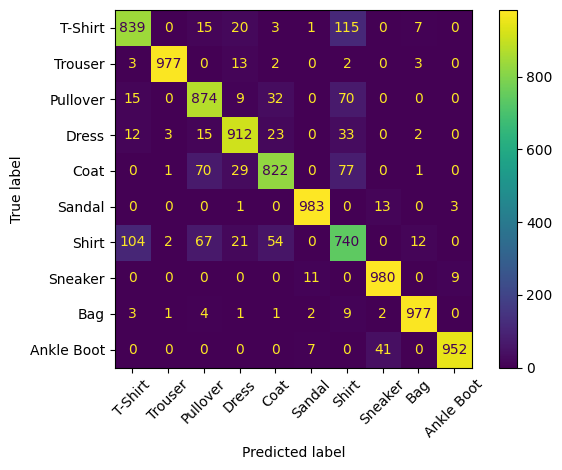

In [122]:
model_classifier_orig = classifier_generator(Classifier_Conv, 64, model_orig, 0.2, 30, 100, 'Adam', 1e-3, train_set_orig, valid_set_orig)

Haciendo un clasificador usando el encoder del modelo original ya entrenado, se ve que se obtienen buenos resultados. Se obtiene un error de perdida menor, y la precision del modelo es bastante buena. Esto es pues el encoder ya esta entrenado, sus parametros ya estan optimizados, y al entrenar el clasificador se optimizan aun mas.

## Clasificador usando n = 256 y p = 0.1

Vamos a clasificar ahora usando el encoder del modelo probado anteriormente, con n=256 y p=0.1, que habia arrojado buenos resultados.

Epoch 1
-------------------------------
batch=0 loss=2.390059  muestras-procesadas:[    0/60000]
batch=100 loss=0.936348  muestras-procesadas:[10000/60000]
batch=200 loss=0.959225  muestras-procesadas:[20000/60000]
batch=300 loss=0.776509  muestras-procesadas:[30000/60000]
batch=400 loss=0.494112  muestras-procesadas:[40000/60000]
batch=500 loss=0.713045  muestras-procesadas:[50000/60000]
Test Error: 
 Accuracy: 87.1%, Avg loss: 0.462663 

Test Error: 
 Accuracy: 86.0%, Avg loss: 0.490600 

Epoch 2
-------------------------------
batch=0 loss=0.666303  muestras-procesadas:[    0/60000]
batch=100 loss=0.753849  muestras-procesadas:[10000/60000]
batch=200 loss=0.569055  muestras-procesadas:[20000/60000]
batch=300 loss=0.612933  muestras-procesadas:[30000/60000]
batch=400 loss=0.413800  muestras-procesadas:[40000/60000]
batch=500 loss=0.639839  muestras-procesadas:[50000/60000]
Test Error: 
 Accuracy: 88.9%, Avg loss: 0.406380 

Test Error: 
 Accuracy: 87.9%, Avg loss: 0.434969 

Epoch 3


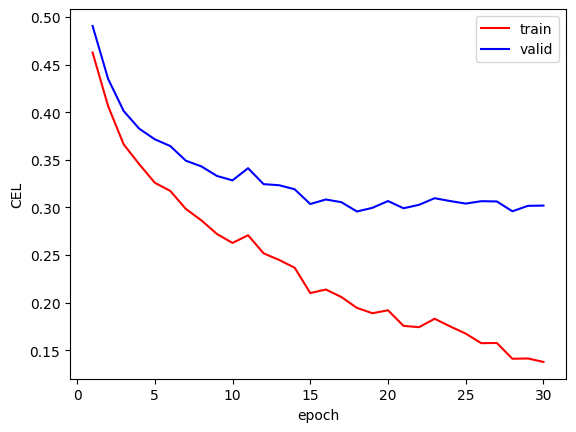

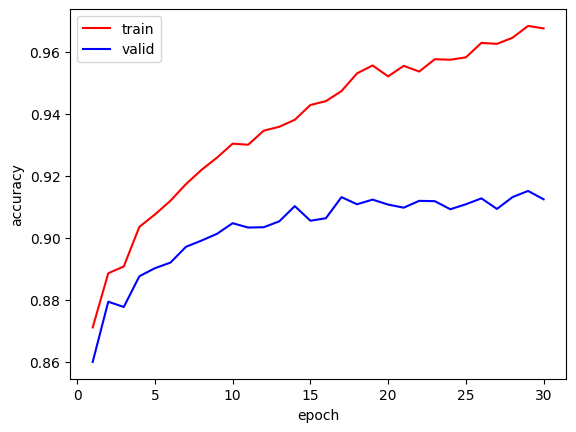

c:\Users\julian\OneDrive\Documentos\Facultad\Redes Neuronales\Practico\classifier.py:162: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.int8)


              precision    recall  f1-score   support

     T-Shirt       0.83      0.89      0.86      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.84      0.88      0.86      1000
       Dress       0.92      0.93      0.92      1000
        Coat       0.86      0.86      0.86      1000
      Sandal       0.98      0.99      0.98      1000
       Shirt       0.79      0.69      0.73      1000
     Sneaker       0.96      0.96      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle Boot       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



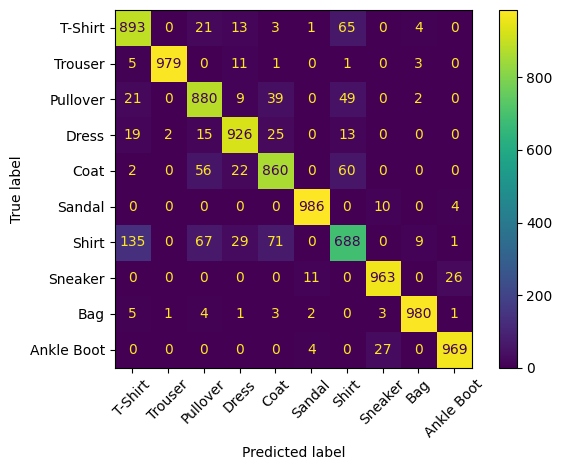

In [123]:
classifier_1 = classifier_generator(Classifier_Conv, 256, model_drop01, 0.1, 30, 100, 'Adam', 1e-3, train_set_orig, valid_set_orig)

Epoch 1
-------------------------------
batch=0 loss=2.325909  muestras-procesadas:[    0/60000]
batch=100 loss=1.474344  muestras-procesadas:[10000/60000]
batch=200 loss=1.407883  muestras-procesadas:[20000/60000]
batch=300 loss=1.324881  muestras-procesadas:[30000/60000]
batch=400 loss=1.430394  muestras-procesadas:[40000/60000]
batch=500 loss=1.282889  muestras-procesadas:[50000/60000]
Test Error: 
 Accuracy: 74.8%, Avg loss: 1.019070 

Test Error: 
 Accuracy: 73.7%, Avg loss: 1.039378 

Epoch 2
-------------------------------
batch=0 loss=1.348876  muestras-procesadas:[    0/60000]
batch=100 loss=1.295120  muestras-procesadas:[10000/60000]
batch=200 loss=1.173321  muestras-procesadas:[20000/60000]
batch=300 loss=1.324559  muestras-procesadas:[30000/60000]
batch=400 loss=1.213592  muestras-procesadas:[40000/60000]
batch=500 loss=1.307675  muestras-procesadas:[50000/60000]
Test Error: 
 Accuracy: 87.0%, Avg loss: 0.718315 

Test Error: 
 Accuracy: 85.5%, Avg loss: 0.741742 

Epoch 3


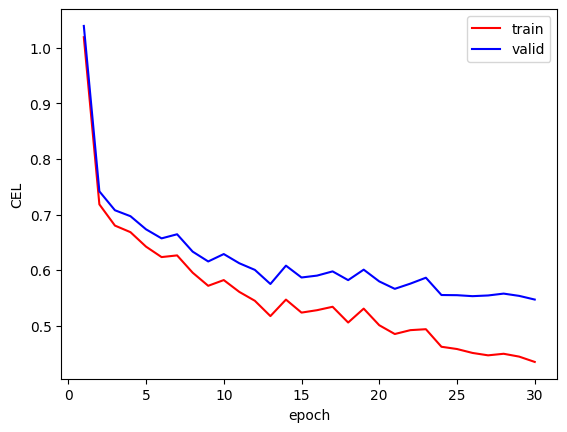

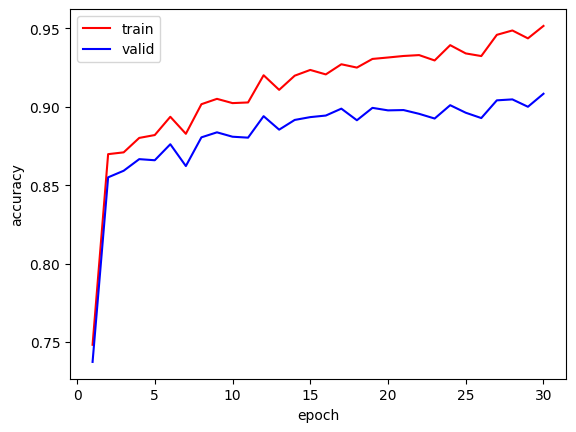

c:\Users\julian\OneDrive\Documentos\Facultad\Redes Neuronales\Practico\classifier.py:162: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.int8)


              precision    recall  f1-score   support

     T-Shirt       0.90      0.76      0.83      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.84      0.88      0.86      1000
       Dress       0.88      0.94      0.91      1000
        Coat       0.89      0.83      0.86      1000
      Sandal       0.98      0.99      0.98      1000
       Shirt       0.71      0.78      0.74      1000
     Sneaker       0.96      0.97      0.97      1000
         Bag       0.98      0.98      0.98      1000
  Ankle Boot       0.98      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



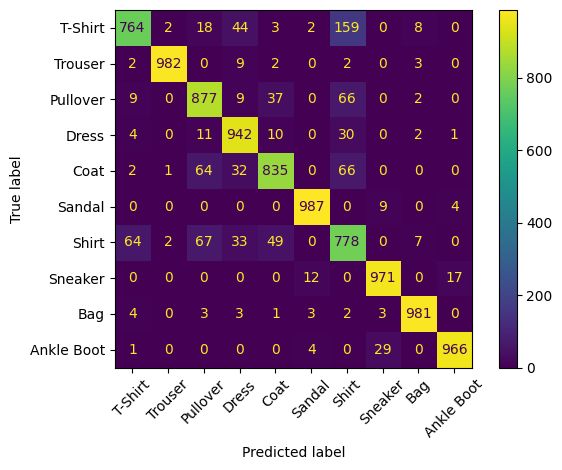

In [126]:
classifier_2 = classifier_generator(Classifier_Conv, 256, model_drop01, 0.3, 30, 100, 'Adam', 1e-3, train_set_orig, valid_set_orig)

Epoch 1
-------------------------------
batch=0 loss=2.370475  muestras-procesadas:[    0/60000]
batch=100 loss=1.352662  muestras-procesadas:[10000/60000]
batch=200 loss=1.020324  muestras-procesadas:[20000/60000]
batch=300 loss=0.915324  muestras-procesadas:[30000/60000]
batch=400 loss=1.014643  muestras-procesadas:[40000/60000]
batch=500 loss=1.150204  muestras-procesadas:[50000/60000]
Test Error: 
 Accuracy: 86.7%, Avg loss: 0.546130 

Test Error: 
 Accuracy: 85.7%, Avg loss: 0.569399 

Epoch 2
-------------------------------
batch=0 loss=0.924490  muestras-procesadas:[    0/60000]
batch=100 loss=0.575257  muestras-procesadas:[10000/60000]
batch=200 loss=0.877240  muestras-procesadas:[20000/60000]
batch=300 loss=0.722613  muestras-procesadas:[30000/60000]
batch=400 loss=0.670738  muestras-procesadas:[40000/60000]
batch=500 loss=0.959097  muestras-procesadas:[50000/60000]
Test Error: 
 Accuracy: 88.6%, Avg loss: 0.455289 

Test Error: 
 Accuracy: 87.2%, Avg loss: 0.488834 

Epoch 3


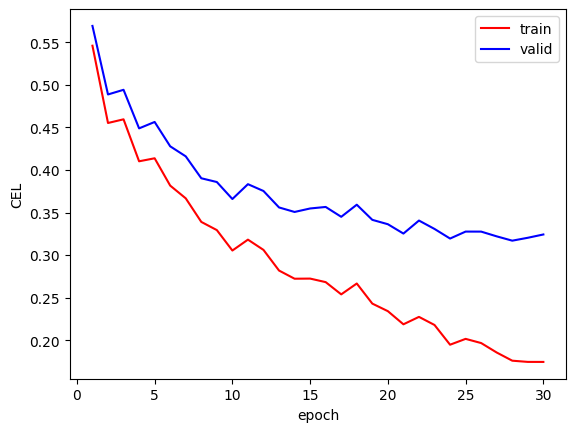

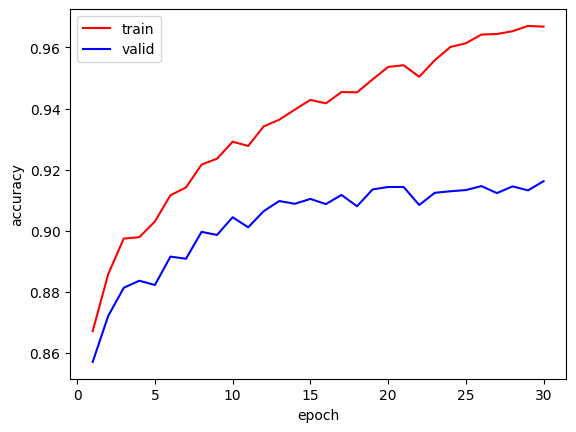

c:\Users\julian\OneDrive\Documentos\Facultad\Redes Neuronales\Practico\classifier.py:162: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.int8)


              precision    recall  f1-score   support

     T-Shirt       0.87      0.83      0.85      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.88      0.87      0.88      1000
       Dress       0.92      0.94      0.93      1000
        Coat       0.88      0.88      0.88      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.74      0.76      0.75      1000
     Sneaker       0.93      0.99      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle Boot       0.99      0.94      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



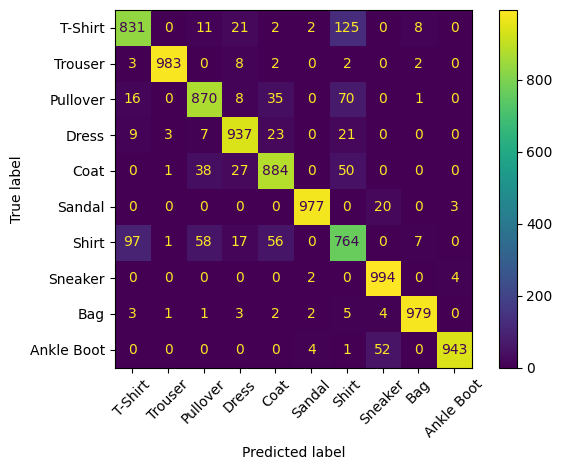

In [128]:
classifier_3 = classifier_generator(Classifier_Conv, 256, model_drop01, 0.2, 30, 100, 'Adam', 1e-3, train_set_orig, valid_set_orig)

Con este clasificador se obtiene una leve mejora en la funcion de perdida, pero el accuaracy de validacion se mantiene practicamente igual, el cual se puede observar en la matriz de confusion.

Tambien se observa que la categoria que menos precision tiene a la hora de clasificar correctamente es la de 'Shirt', que se las confunde con la de 'T-Shirt', 'Pullover', 'Dress' y 'Coat'.

Epoch 1
-------------------------------
batch=0 loss=2.302703  muestras-procesadas:[    0/60000]
batch=100 loss=2.304363  muestras-procesadas:[10000/60000]
batch=200 loss=2.301018  muestras-procesadas:[20000/60000]
batch=300 loss=2.300502  muestras-procesadas:[30000/60000]
batch=400 loss=2.292546  muestras-procesadas:[40000/60000]
batch=500 loss=2.297062  muestras-procesadas:[50000/60000]
Test Error: 
 Accuracy: 10.4%, Avg loss: 2.296332 

Test Error: 
 Accuracy: 10.3%, Avg loss: 2.296345 

Epoch 2
-------------------------------
batch=0 loss=2.297331  muestras-procesadas:[    0/60000]
batch=100 loss=2.299646  muestras-procesadas:[10000/60000]
batch=200 loss=2.297633  muestras-procesadas:[20000/60000]
batch=300 loss=2.293846  muestras-procesadas:[30000/60000]
batch=400 loss=2.284590  muestras-procesadas:[40000/60000]
batch=500 loss=2.289575  muestras-procesadas:[50000/60000]
Test Error: 
 Accuracy: 25.8%, Avg loss: 2.289491 

Test Error: 
 Accuracy: 26.0%, Avg loss: 2.289518 

Epoch 3


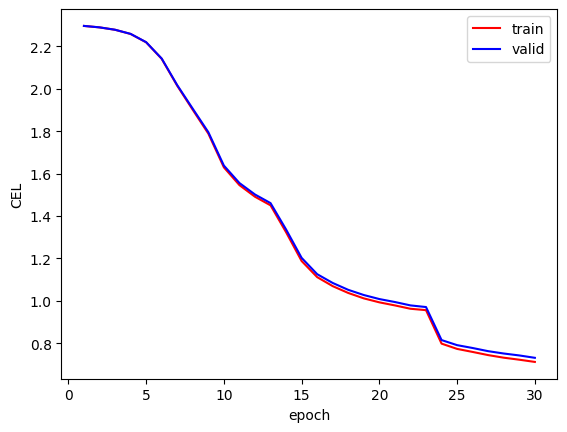

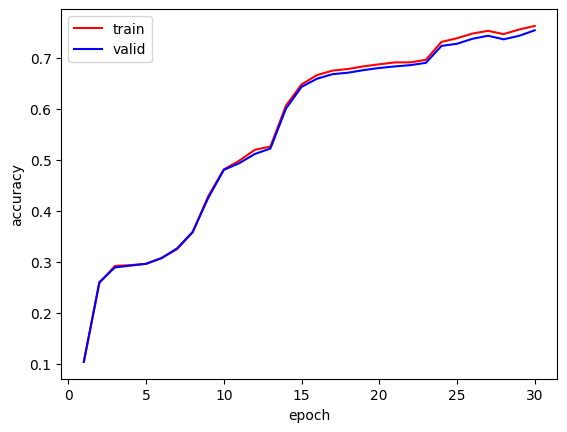

c:\Users\julian\OneDrive\Documentos\Facultad\Redes Neuronales\Practico\classifier.py:162: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.int8)


              precision    recall  f1-score   support

     T-Shirt       0.74      0.75      0.75      1000
     Trouser       0.94      0.91      0.93      1000
    Pullover       0.54      0.62      0.58      1000
       Dress       0.74      0.79      0.77      1000
        Coat       0.60      0.64      0.62      1000
      Sandal       0.87      0.87      0.87      1000
       Shirt       0.38      0.28      0.32      1000
     Sneaker       0.84      0.86      0.85      1000
         Bag       0.93      0.90      0.91      1000
  Ankle Boot       0.91      0.92      0.91      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



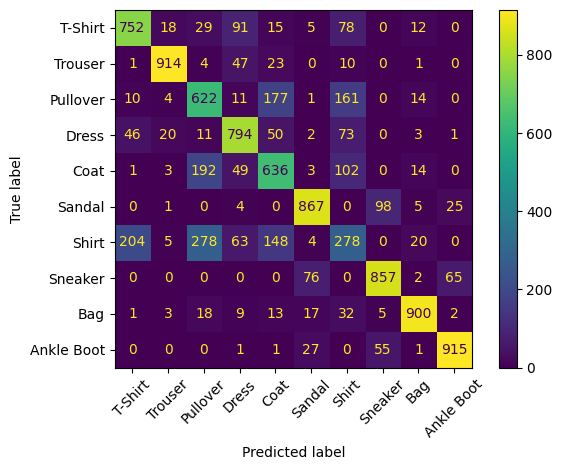

In [129]:
classifier_4 = classifier_generator(Classifier_Conv, 256, model_sgd, 0.05, 30, 100, 'SGD', 1e-3, train_set_orig, valid_set_orig)

## Entrenando solo la capa clasificadora

Epoch 1
-------------------------------
batch=0 loss=2.361043  muestras-procesadas:[    0/60000]
batch=100 loss=1.273286  muestras-procesadas:[10000/60000]
batch=200 loss=1.173751  muestras-procesadas:[20000/60000]
batch=300 loss=1.040303  muestras-procesadas:[30000/60000]
batch=400 loss=0.967936  muestras-procesadas:[40000/60000]
batch=500 loss=0.934580  muestras-procesadas:[50000/60000]
Test Error: 
 Accuracy: 77.9%, Avg loss: 0.858668 

Test Error: 
 Accuracy: 77.0%, Avg loss: 0.876053 

Epoch 2
-------------------------------
batch=0 loss=0.838627  muestras-procesadas:[    0/60000]
batch=100 loss=1.045597  muestras-procesadas:[10000/60000]
batch=200 loss=1.011743  muestras-procesadas:[20000/60000]
batch=300 loss=0.938101  muestras-procesadas:[30000/60000]
batch=400 loss=0.912945  muestras-procesadas:[40000/60000]
batch=500 loss=0.860509  muestras-procesadas:[50000/60000]
Test Error: 
 Accuracy: 80.2%, Avg loss: 0.781843 

Test Error: 
 Accuracy: 78.7%, Avg loss: 0.801355 

Epoch 3


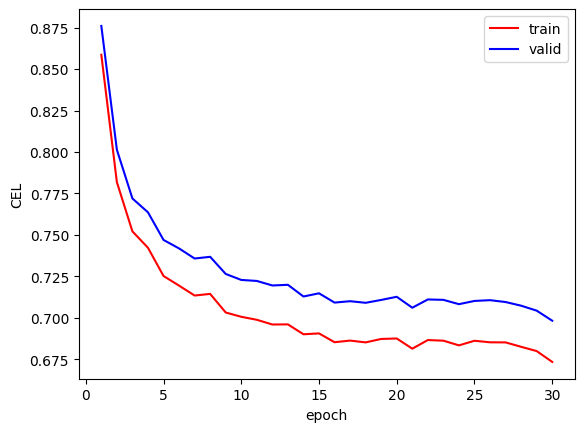

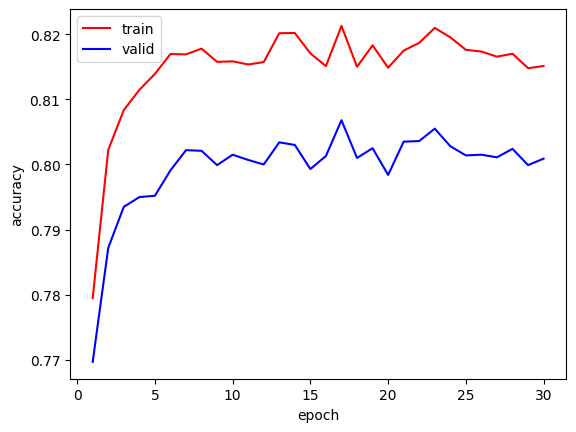

c:\Users\julian\OneDrive\Documentos\Facultad\Redes Neuronales\Practico\classifier.py:162: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.int8)


              precision    recall  f1-score   support

     T-Shirt       0.93      0.25      0.39      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.67      0.78      0.72      1000
       Dress       0.77      0.90      0.83      1000
        Coat       0.74      0.69      0.71      1000
      Sandal       0.96      0.94      0.95      1000
       Shirt       0.45      0.65      0.53      1000
     Sneaker       0.91      0.94      0.93      1000
         Bag       0.93      0.96      0.94      1000
  Ankle Boot       0.95      0.95      0.95      1000

    accuracy                           0.80     10000
   macro avg       0.83      0.80      0.79     10000
weighted avg       0.83      0.80      0.79     10000



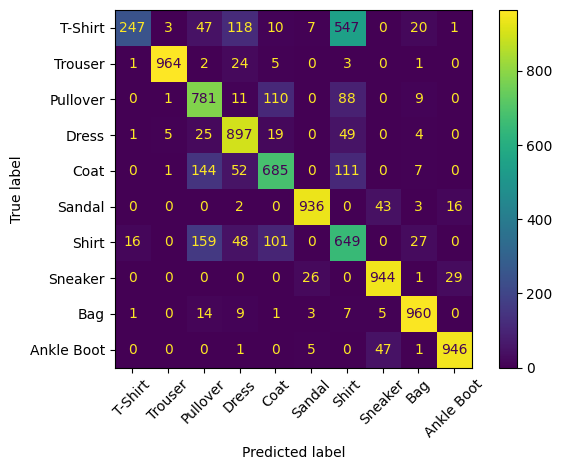

In [133]:
classifier_5 = classifier_generator(Classifier_Conv, 256, model_drop01, 0.1, 30, 100, 'Adam classifier', 1e-3, train_set_orig, valid_set_orig)

Se obtienen resultados un poco peores, aunque siguen siendo buenos, por el hecho de estar entrenando solo una capa, la clasificadora, a pesar de que el encoder ya esta entrenado.

Epoch 1
-------------------------------
batch=0 loss=2.512123  muestras-procesadas:[    0/60000]
batch=100 loss=1.834873  muestras-procesadas:[10000/60000]
batch=200 loss=1.578808  muestras-procesadas:[20000/60000]
batch=300 loss=1.550171  muestras-procesadas:[30000/60000]
batch=400 loss=1.444321  muestras-procesadas:[40000/60000]
batch=500 loss=1.396115  muestras-procesadas:[50000/60000]
Test Error: 
 Accuracy: 68.7%, Avg loss: 1.310765 

Test Error: 
 Accuracy: 68.3%, Avg loss: 1.326759 

Epoch 2
-------------------------------
batch=0 loss=1.378621  muestras-procesadas:[    0/60000]
batch=100 loss=1.547126  muestras-procesadas:[10000/60000]
batch=200 loss=1.418634  muestras-procesadas:[20000/60000]
batch=300 loss=1.273037  muestras-procesadas:[30000/60000]
batch=400 loss=0.991332  muestras-procesadas:[40000/60000]
batch=500 loss=1.318064  muestras-procesadas:[50000/60000]
Test Error: 
 Accuracy: 77.8%, Avg loss: 1.050470 

Test Error: 
 Accuracy: 77.4%, Avg loss: 1.066078 

Epoch 3


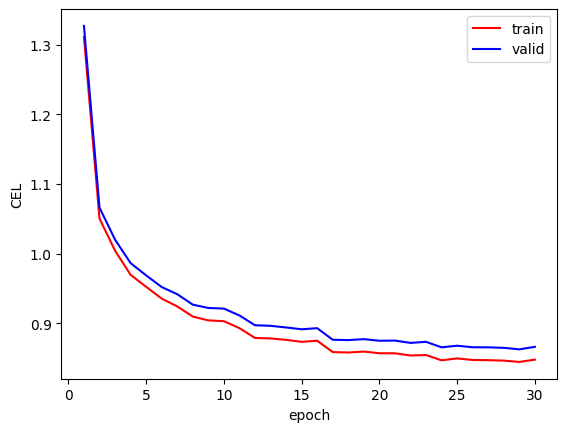

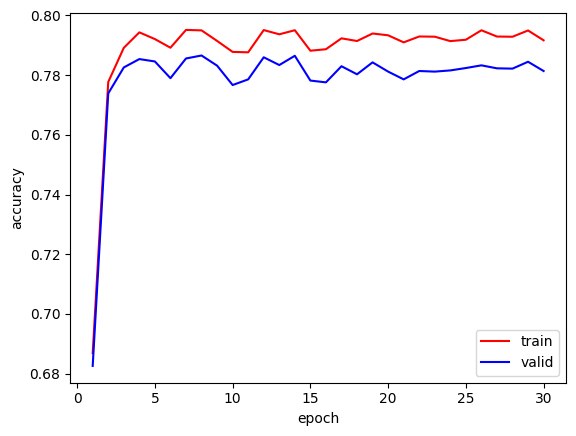

c:\Users\julian\OneDrive\Documentos\Facultad\Redes Neuronales\Practico\classifier.py:162: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.int8)


              precision    recall  f1-score   support

     T-Shirt       0.75      0.76      0.76      1000
     Trouser       0.99      0.93      0.96      1000
    Pullover       0.63      0.66      0.64      1000
       Dress       0.84      0.80      0.82      1000
        Coat       0.73      0.53      0.61      1000
      Sandal       0.92      0.87      0.90      1000
       Shirt       0.41      0.55      0.47      1000
     Sneaker       0.85      0.93      0.89      1000
         Bag       0.93      0.89      0.91      1000
  Ankle Boot       0.92      0.91      0.91      1000

    accuracy                           0.78     10000
   macro avg       0.80      0.78      0.79     10000
weighted avg       0.80      0.78      0.79     10000



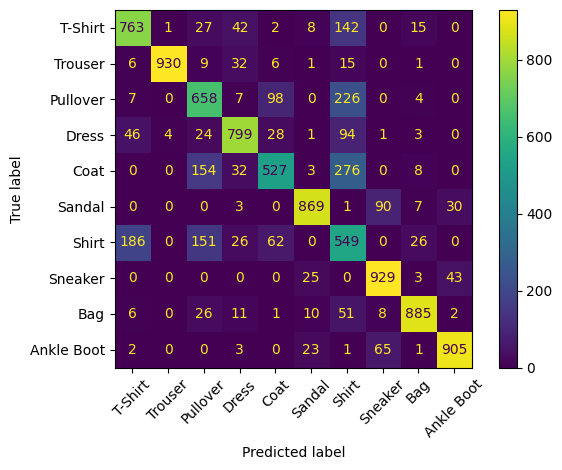

In [131]:
classifier_6 = classifier_generator(Classifier_Conv, 64, model_orig, 0.2, 30, 100, 'Adam classifier', 1e-3, train_set_orig, valid_set_orig)

Epoch 1
-------------------------------
batch=0 loss=0.356120  muestras-procesadas:[    0/60000]
batch=100 loss=0.166846  muestras-procesadas:[10000/60000]
batch=200 loss=0.148049  muestras-procesadas:[20000/60000]
batch=300 loss=0.127402  muestras-procesadas:[30000/60000]
batch=400 loss=0.123743  muestras-procesadas:[40000/60000]
batch=500 loss=0.122380  muestras-procesadas:[50000/60000]
Valid Error: Avg loss: 0.071983 

Valid Error: Avg loss: 0.072029 

Epoch 2
-------------------------------
batch=0 loss=0.117208  muestras-procesadas:[    0/60000]
batch=100 loss=0.110561  muestras-procesadas:[10000/60000]
batch=200 loss=0.108095  muestras-procesadas:[20000/60000]
batch=300 loss=0.100894  muestras-procesadas:[30000/60000]
batch=400 loss=0.096796  muestras-procesadas:[40000/60000]
batch=500 loss=0.098337  muestras-procesadas:[50000/60000]
Valid Error: Avg loss: 0.069899 

Valid Error: Avg loss: 0.069970 

Epoch 3
-------------------------------
batch=0 loss=0.101757  muestras-procesad

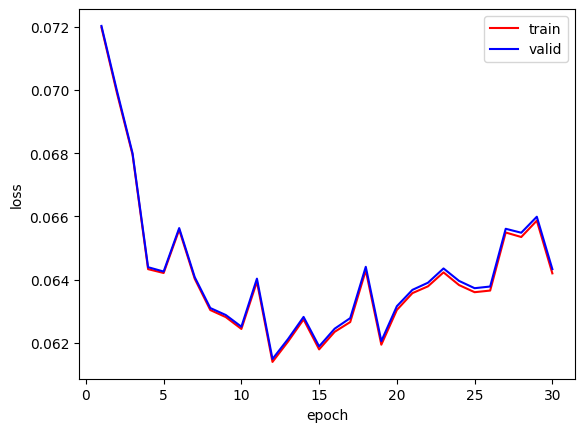

In [134]:
model_drop03 = model_generator(Autoencoder, 256, 0.3, 30, 100, 'Adam', 1e-3, train_set, valid_set)

Epoch 1
-------------------------------
batch=0 loss=2.410045  muestras-procesadas:[    0/60000]
batch=100 loss=1.448050  muestras-procesadas:[10000/60000]
batch=200 loss=1.395331  muestras-procesadas:[20000/60000]
batch=300 loss=1.267699  muestras-procesadas:[30000/60000]
batch=400 loss=1.332565  muestras-procesadas:[40000/60000]
batch=500 loss=1.324941  muestras-procesadas:[50000/60000]
Test Error: 
 Accuracy: 78.9%, Avg loss: 1.303734 

Test Error: 
 Accuracy: 78.6%, Avg loss: 1.314796 

Epoch 2
-------------------------------
batch=0 loss=1.247375  muestras-procesadas:[    0/60000]
batch=100 loss=1.368015  muestras-procesadas:[10000/60000]
batch=200 loss=1.305352  muestras-procesadas:[20000/60000]
batch=300 loss=1.547317  muestras-procesadas:[30000/60000]
batch=400 loss=1.302053  muestras-procesadas:[40000/60000]
batch=500 loss=1.334363  muestras-procesadas:[50000/60000]
Test Error: 
 Accuracy: 79.8%, Avg loss: 1.207824 

Test Error: 
 Accuracy: 79.3%, Avg loss: 1.219873 

Epoch 3


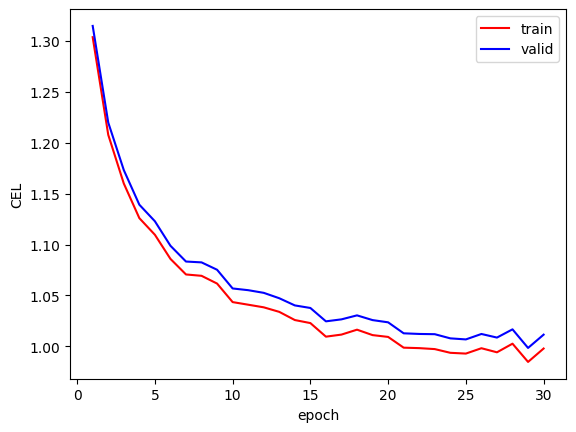

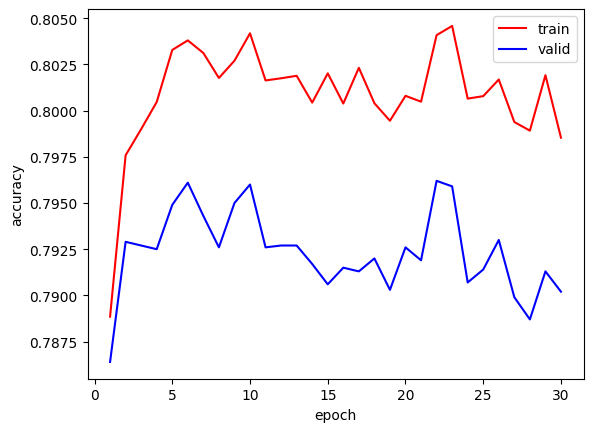

c:\Users\julian\OneDrive\Documentos\Facultad\Redes Neuronales\Practico\classifier.py:162: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.int8)


              precision    recall  f1-score   support

     T-Shirt       0.69      0.87      0.77      1000
     Trouser       0.99      0.95      0.97      1000
    Pullover       0.50      0.86      0.63      1000
       Dress       0.82      0.87      0.84      1000
        Coat       0.67      0.65      0.66      1000
      Sandal       0.96      0.87      0.92      1000
       Shirt       0.00      0.00      0.00      1000
     Sneaker       0.86      0.95      0.90      1000
         Bag       0.93      0.94      0.93      1000
  Ankle Boot       0.93      0.94      0.93      1000

    accuracy                           0.79     10000
   macro avg       0.74      0.79      0.76     10000
weighted avg       0.74      0.79      0.76     10000



C:\Users\julian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\julian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\julian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1

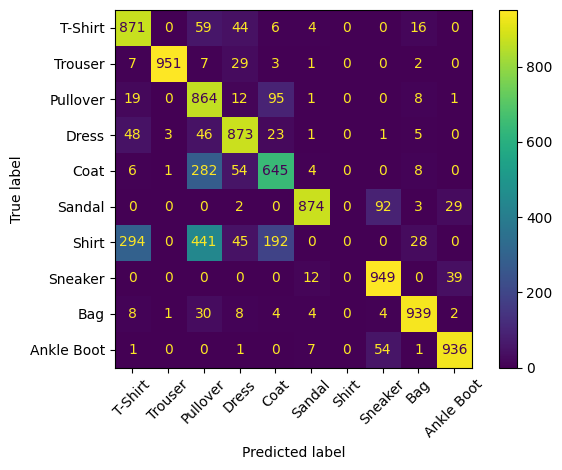

In [136]:
classifier_7 = classifier_generator(Classifier_Conv, 256, model_drop03, 0.3, 30, 100, 'Adam classifier', 1e-3, train_set_orig, valid_set_orig)